# Supervised Machine Learning Models - Classification - Stored grain state Predictions

## 1. What is Machine Learning (ML) in a nutshell
- “Machine learning is the science (and art) of programming computers so they can learn from data” by Aurélien Géron book (Hands-On Machine Learning with Scikit-Learn and TensorFlow)
- ML uses statistical models and algorithms to perform tasks like predictions & classifications without explicit instructions
- ML is a subset of Artificial Intelligence

In [239]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from pathlib import Path

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error,confusion_matrix, accuracy_score, classification_report, log_loss, ConfusionMatrixDisplay
from math import sqrt
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, train_test_split, GridSearchCV,KFold
from joblib import dump



np.random.seed(42)
# To change scientific numbers to float (doesnt deal with the model)
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(5,5)})

# view all the dataframe
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

# remove warnings   
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None

## 3. Loading & Investigating the raw data

In [240]:
# loading the raw data

# raw_data = pd.read_csv("C://Users//pitsi//Desktop//Python Tutorials//2022 Python Tutorial//3. Classification Model//train.csv")
# evaluation_data = pd.read_csv("C://Users//pitsi//Desktop//Python Tutorials//2022 Python Tutorial//3. Classification Model//test.csv")
# submission_example = pd.read_csv("C://Users//pitsi//Desktop//Python Tutorials//2022 Python Tutorial//3. Classification Model//sample_submission.csv")

raw_data = pd.read_excel("U:\\Python Practice File\\machine_learning\\Bin5_ML_Year1_18May24.xlsx")
raw_data
print('raw_data', raw_data.shape)
# print('evaluation_data', evaluation_data.shape)
# print('submission_example', submission_example.shape)



raw_data (288, 18)


In [241]:
raw_data.head()

Grain_Bulk_RH  EMC_Center  Ambient_Temp  Ambient_RH  Headspace_Temp  \
0      72.126667   14.929250     66.966667   66.361667       57.211200   
1      72.590833   14.974917     67.409167   74.795417       60.274874   
2      79.719298   16.790167     39.450833   83.077500       48.253696   
3      73.570000   15.604583     38.290000   73.415417       28.839312   
4      76.159355   15.651130     36.997917   76.479167       30.400642   

   Headspace_RH  Headspace_CO2  Plenum_Temp  Plenum_RH  Plenum_CO2    Temp_C1  \
0     74.633400     537.000000    59.633700  74.084000  531.000000  62.656667   
1     72.263439     535.391304    63.152558  78.816875  524.166667  62.351667   
2     77.125446     510.000000    58.244643  81.005930  518.869565  47.068772   
3     80.843108     518.916667    48.137579  72.820833  550.041667  43.173333   
4     75.755637     523.541667    47.354100  67.959329  545.375000  41.533548   

     Temp_C2    Temp_C3    Temp_C4    Temp_C5  Average_Grain_Temp Season  \
0  62.083333  64.178125  62.567500  62.205833           62.738292   Fall   
1  62.620000  64.181250  62.609167  62.252500           62.802917   Fall   
2  46.667018  46.510965  47.249474  46.206316           46.740509   Fall   
3  40.950000  42.478125  43.771667  42.185000           42.511625   Fall   
4  39.767097  40.683065  42.313548  40.587097           40.976871   Fall   

  Grain_state  
0     Initial  
1     Initial  
2     Initial  
3     Initial  
4     Initial

In [242]:
# Checking for null values

raw_data.isnull().sum()

Grain_Bulk_RH         0
EMC_Center            0
Ambient_Temp          0
Ambient_RH            0
Headspace_Temp        0
Headspace_RH          0
Headspace_CO2         0
Plenum_Temp           0
Plenum_RH             0
Plenum_CO2            0
Temp_C1               0
Temp_C2               0
Temp_C3               0
Temp_C4               0
Temp_C5               0
Average_Grain_Temp    0
Season                0
Grain_state           0
dtype: int64

In [243]:
# Vizualizing the dtypes
raw_data.dtypes

Grain_Bulk_RH         float64
EMC_Center            float64
Ambient_Temp          float64
Ambient_RH            float64
Headspace_Temp        float64
Headspace_RH          float64
Headspace_CO2         float64
Plenum_Temp           float64
Plenum_RH             float64
Plenum_CO2            float64
Temp_C1               float64
Temp_C2               float64
Temp_C3               float64
Temp_C4               float64
Temp_C5               float64
Average_Grain_Temp    float64
Season                 object
Grain_state            object
dtype: object

In [244]:
# changing the types so we can visualize

strings = ['Season', 'Grain_state']
numeric = [ 'Grain_Bulk_RH','EMC_Center','Ambient_Temp', 'Ambient_RH', 'Headspace_Temp', 'Headspace_RH','Headspace_CO2','Plenum_Temp','Plenum_RH', 
           'Plenum_CO2','Temp_C1','Temp_C2','Temp_C3','Temp_C4','Temp_C5', 'Average_Grain_Temp']

for s in strings:
    raw_data[s] = raw_data[s].astype(str)
    
for n in numeric:
    #raw_data[n][raw_data[n] == 'Unknown'] = 0
    raw_data[n] = raw_data[n].astype(float)

In [245]:
raw_data.head()

Grain_Bulk_RH  EMC_Center  Ambient_Temp  Ambient_RH  Headspace_Temp  \
0      72.126667   14.929250     66.966667   66.361667       57.211200   
1      72.590833   14.974917     67.409167   74.795417       60.274874   
2      79.719298   16.790167     39.450833   83.077500       48.253696   
3      73.570000   15.604583     38.290000   73.415417       28.839312   
4      76.159355   15.651130     36.997917   76.479167       30.400642   

   Headspace_RH  Headspace_CO2  Plenum_Temp  Plenum_RH  Plenum_CO2    Temp_C1  \
0     74.633400     537.000000    59.633700  74.084000  531.000000  62.656667   
1     72.263439     535.391304    63.152558  78.816875  524.166667  62.351667   
2     77.125446     510.000000    58.244643  81.005930  518.869565  47.068772   
3     80.843108     518.916667    48.137579  72.820833  550.041667  43.173333   
4     75.755637     523.541667    47.354100  67.959329  545.375000  41.533548   

     Temp_C2    Temp_C3    Temp_C4    Temp_C5  Average_Grain_Temp Season  \
0  62.083333  64.178125  62.567500  62.205833           62.738292   Fall   
1  62.620000  64.181250  62.609167  62.252500           62.802917   Fall   
2  46.667018  46.510965  47.249474  46.206316           46.740509   Fall   
3  40.950000  42.478125  43.771667  42.185000           42.511625   Fall   
4  39.767097  40.683065  42.313548  40.587097           40.976871   Fall   

  Grain_state  
0     Initial  
1     Initial  
2     Initial  
3     Initial  
4     Initial

In [246]:
# Investigate all the elements whithin each Feature 

for column in raw_data:
    try:
        unique_vals = np.unique(raw_data[column])
    except:
        unique_vals = raw_data[column].unique()
        
    nr_values = len(unique_vals)
    if nr_values < 10:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature Grain_Bulk_RH :285
The number of values for feature EMC_Center :286
The number of values for feature Ambient_Temp :285
The number of values for feature Ambient_RH :286
The number of values for feature Headspace_Temp :287
The number of values for feature Headspace_RH :287
The number of values for feature Headspace_CO2 :283
The number of values for feature Plenum_Temp :287
The number of values for feature Plenum_RH :287
The number of values for feature Plenum_CO2 :282
The number of values for feature Temp_C1 :286
The number of values for feature Temp_C2 :286
The number of values for feature Temp_C3 :286
The number of values for feature Temp_C4 :286
The number of values for feature Temp_C5 :286
The number of values for feature Average_Grain_Temp :286
The number of values for feature Season :4 -- ['Fall' 'Spring' 'Summer' 'Winter']
The number of values for feature Grain_state :4 -- ['Above-moderate' 'Initial' 'Minimal' 'Moderate']


## 5. Visualizing the Data

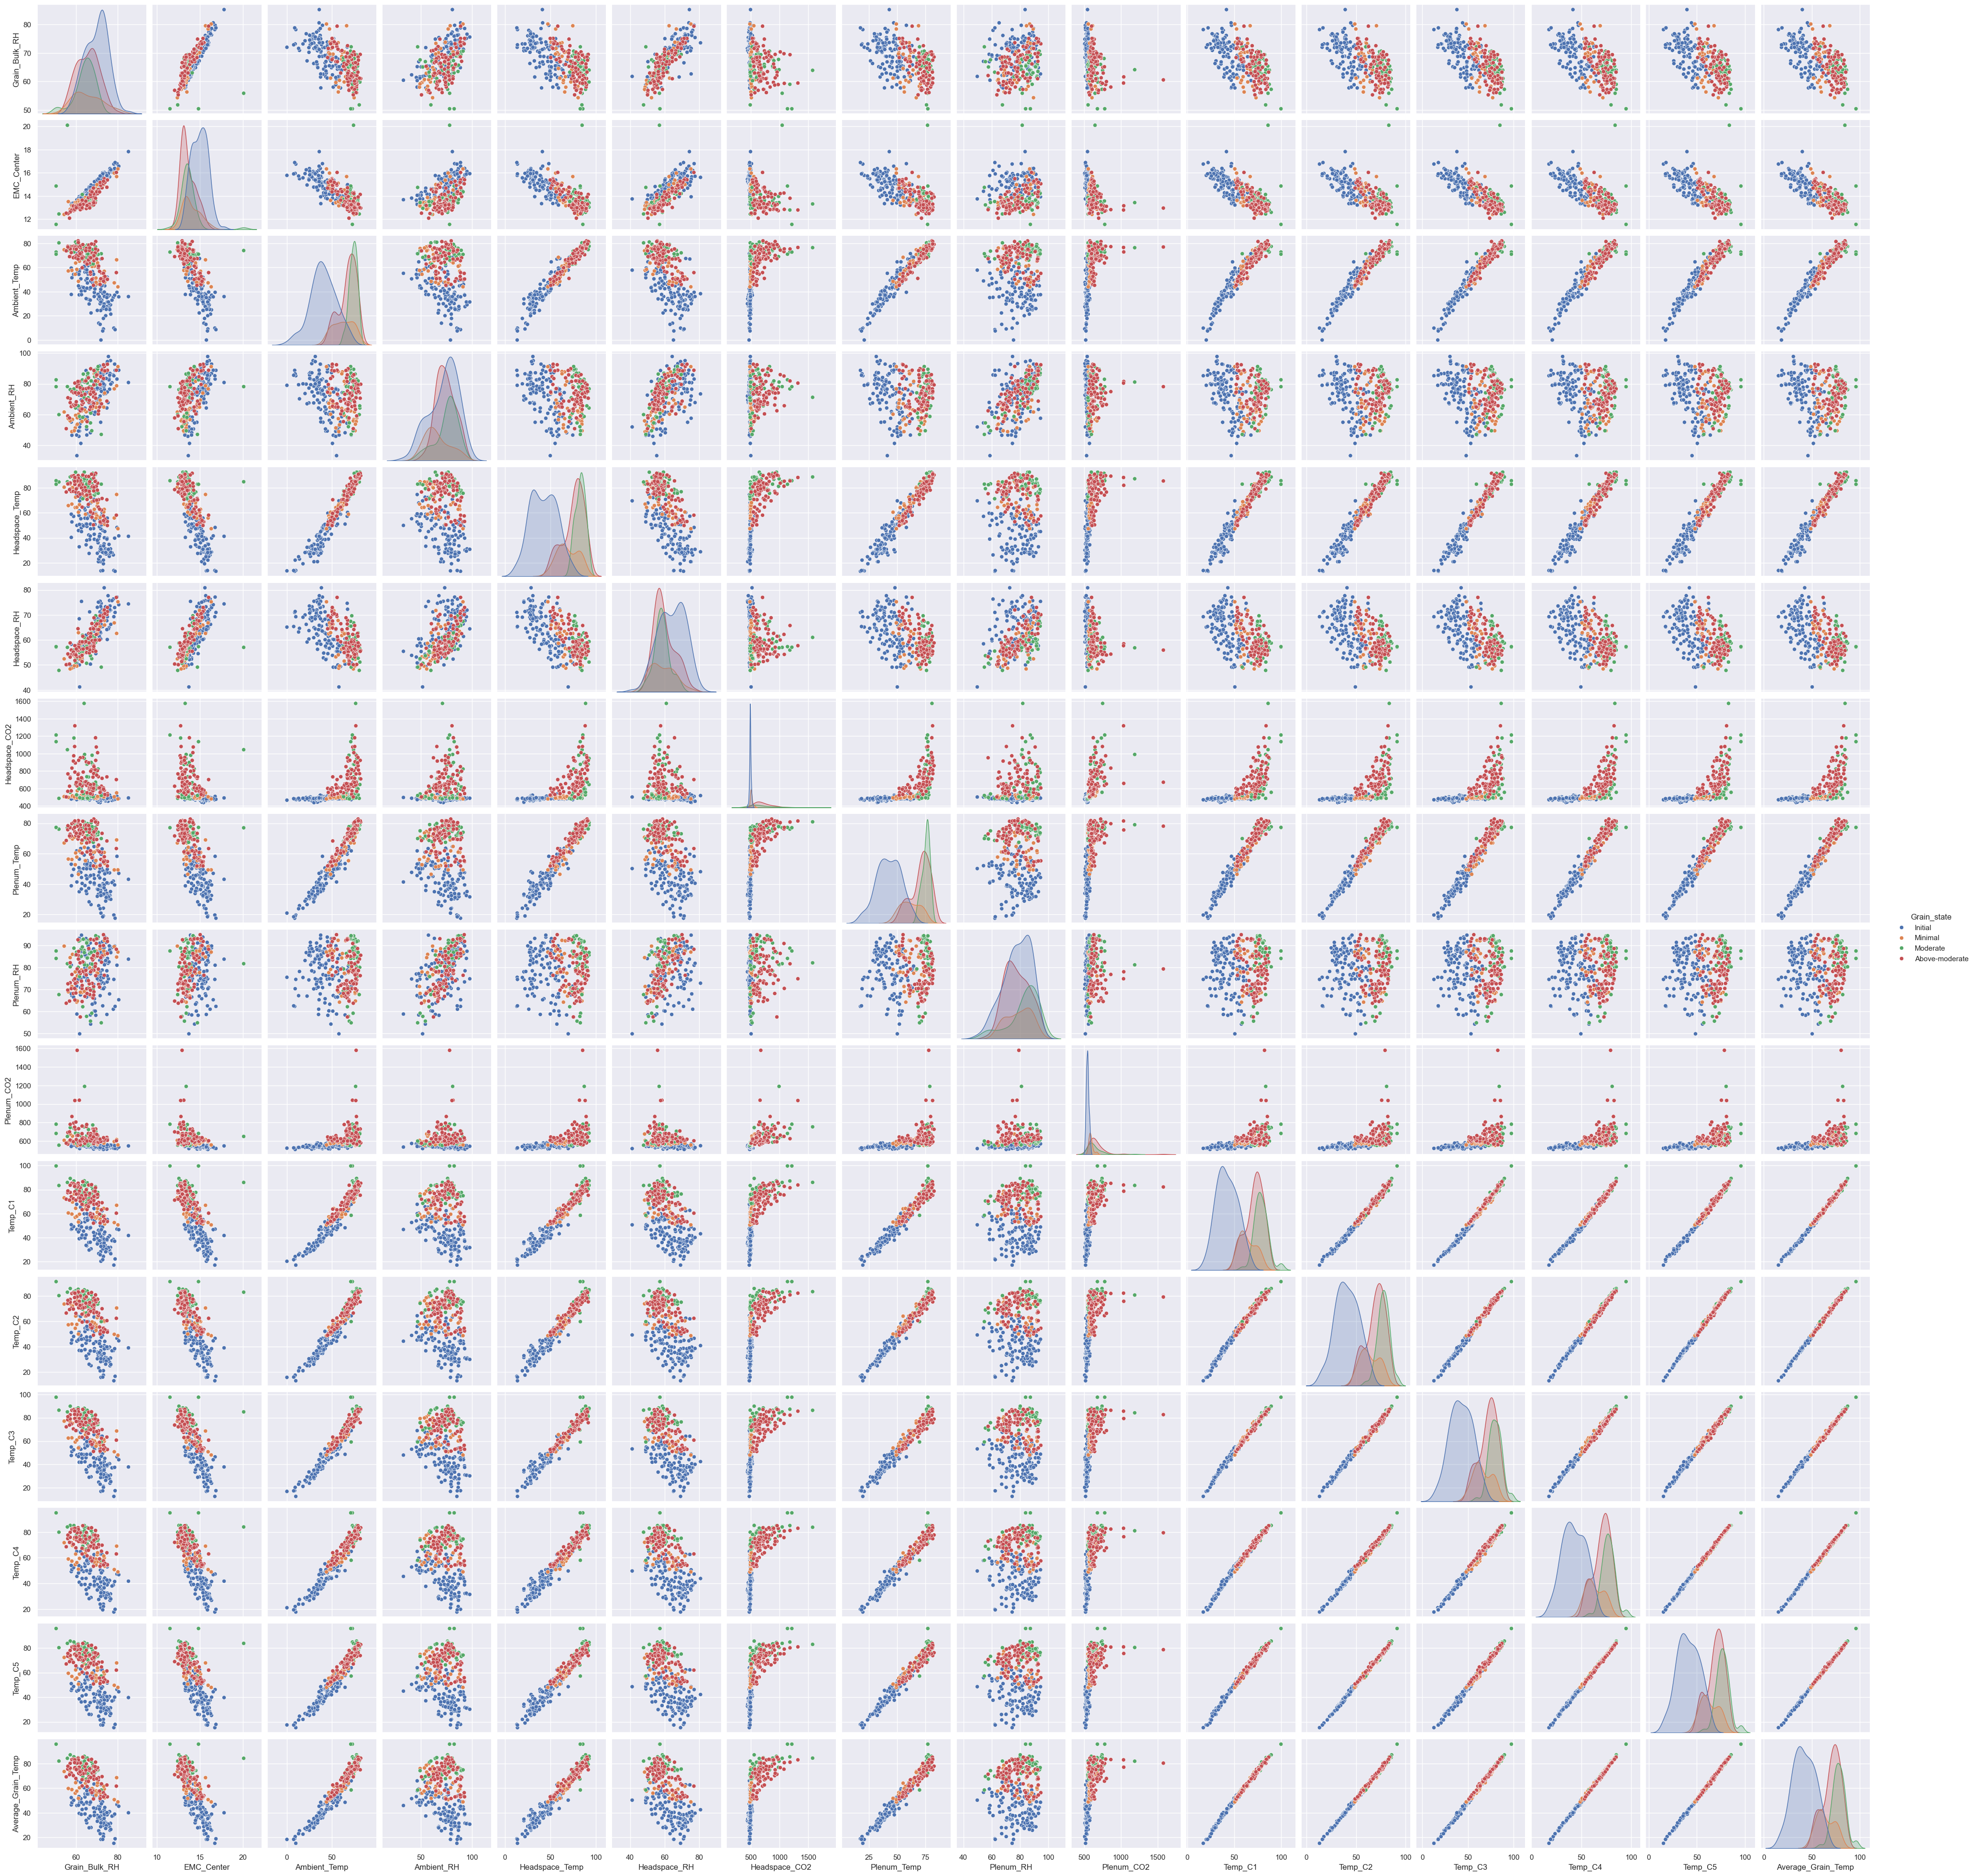

In [247]:
# Example 1 - Visualize the data using seaborn Pairplots for numerical variables + y

A = sns.pairplot(raw_data[[ 'Grain_Bulk_RH','EMC_Center','Ambient_Temp', 'Ambient_RH', 'Headspace_Temp', 'Headspace_RH','Headspace_CO2','Plenum_Temp','Plenum_RH', 
           'Plenum_CO2','Temp_C1','Temp_C2','Temp_C3','Temp_C4','Temp_C5', 'Average_Grain_Temp','Grain_state']], hue = 'Grain_state')#, height = 5, kind="reg")

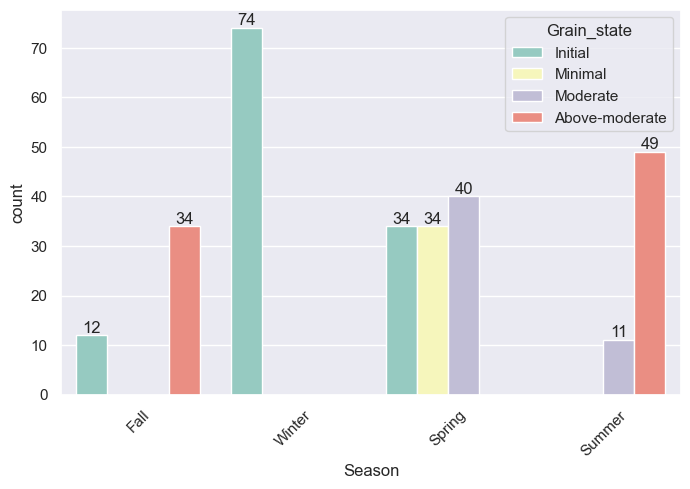

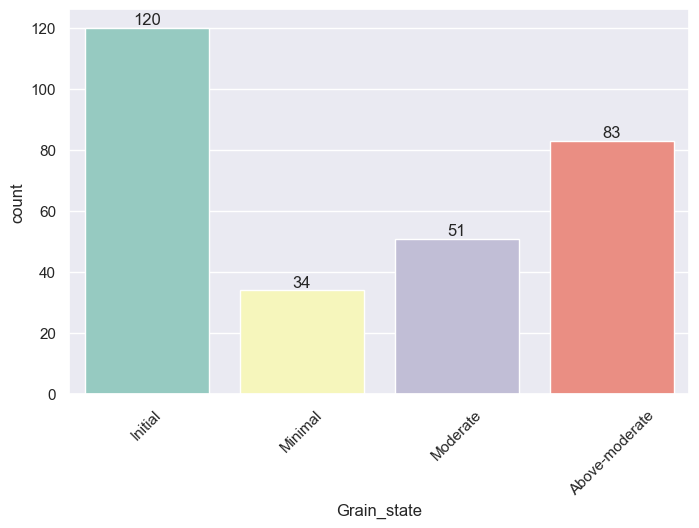

In [248]:
# Example 6 - visualize for categorical/strings variables

categories = ['Season', 'Grain_state']

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,5)})

for f in categories:
    ax = sns.countplot(x = f, data = raw_data, palette = 'Set3', hue = 'Grain_state')
    for container in ax.containers:
        ax.bar_label(container)
    plt.xticks(rotation=45)
    plt.show()

## 7. Investigating distributions

C:\Users\aolenloa\AppData\Local\Temp\ipykernel_22196\4123892087.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


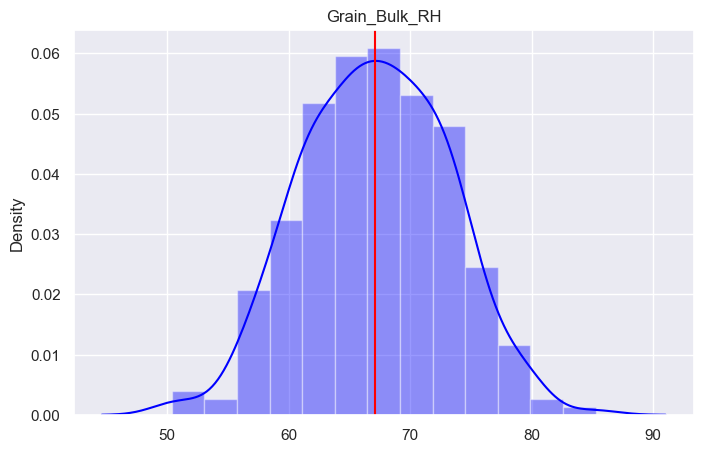

C:\Users\aolenloa\AppData\Local\Temp\ipykernel_22196\4123892087.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


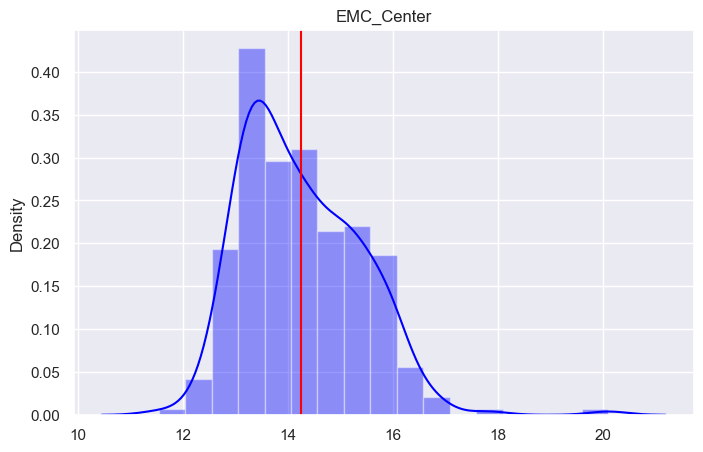

C:\Users\aolenloa\AppData\Local\Temp\ipykernel_22196\4123892087.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


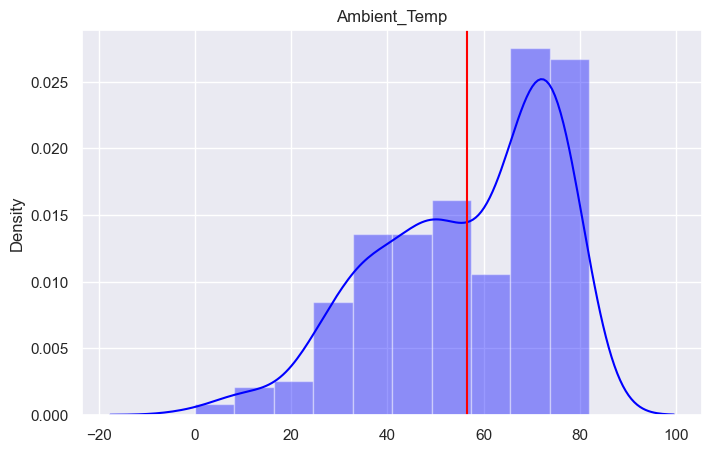

C:\Users\aolenloa\AppData\Local\Temp\ipykernel_22196\4123892087.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


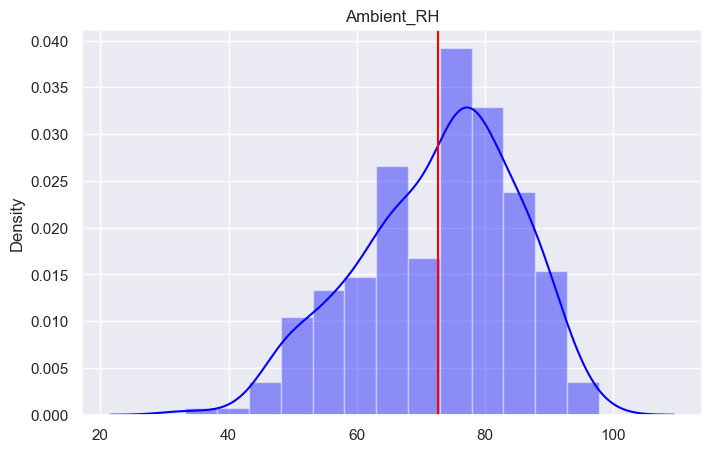

C:\Users\aolenloa\AppData\Local\Temp\ipykernel_22196\4123892087.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


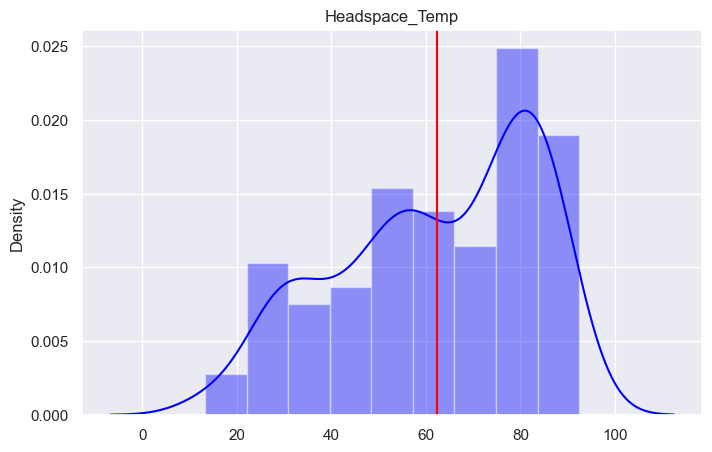

C:\Users\aolenloa\AppData\Local\Temp\ipykernel_22196\4123892087.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


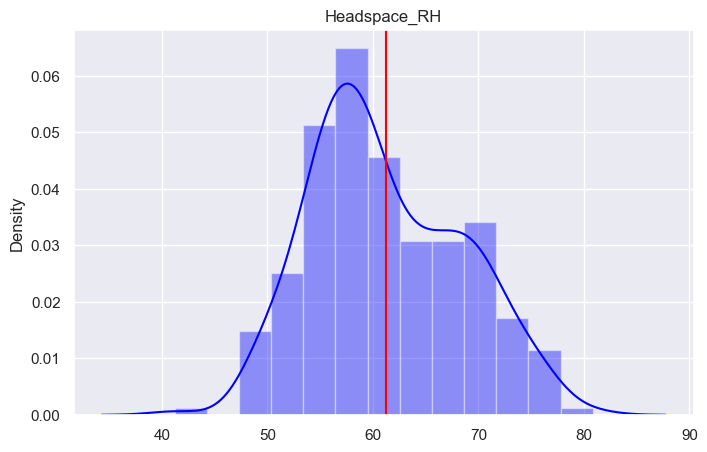

C:\Users\aolenloa\AppData\Local\Temp\ipykernel_22196\4123892087.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


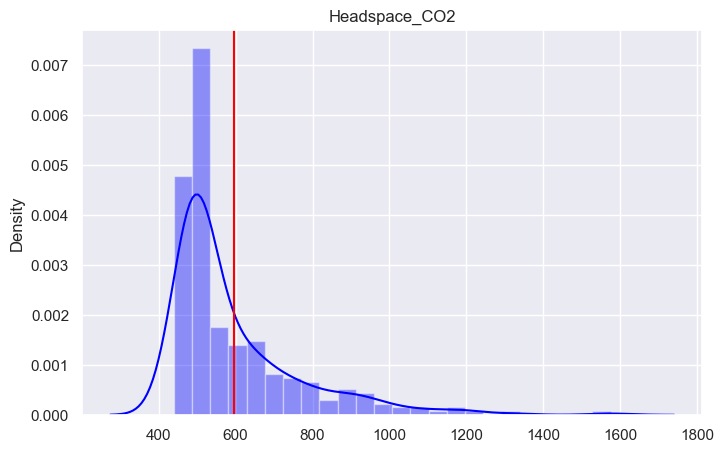

C:\Users\aolenloa\AppData\Local\Temp\ipykernel_22196\4123892087.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


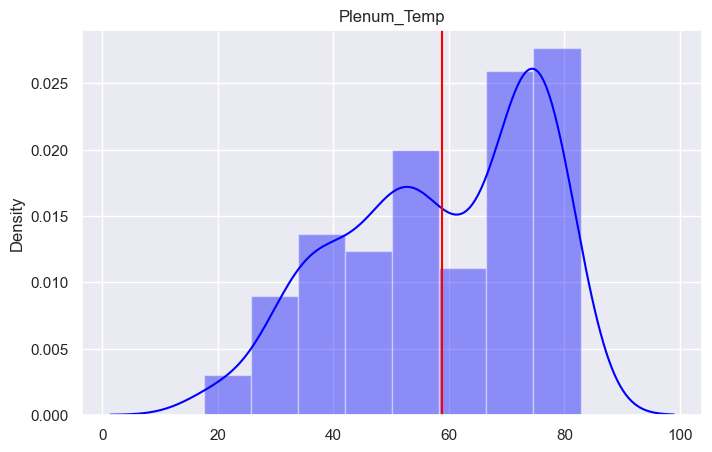

C:\Users\aolenloa\AppData\Local\Temp\ipykernel_22196\4123892087.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


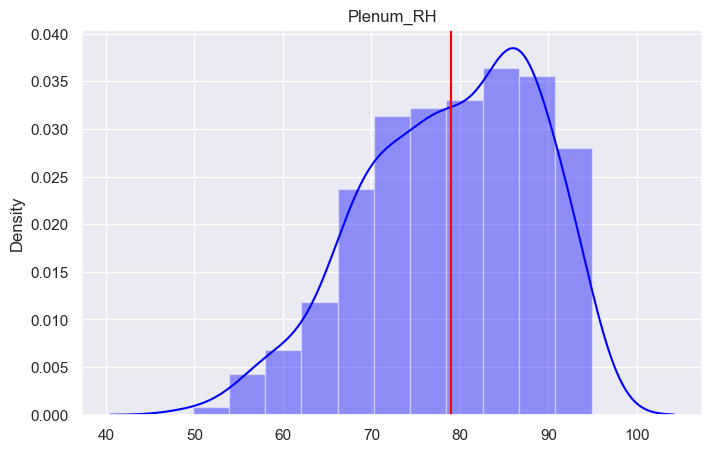

C:\Users\aolenloa\AppData\Local\Temp\ipykernel_22196\4123892087.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


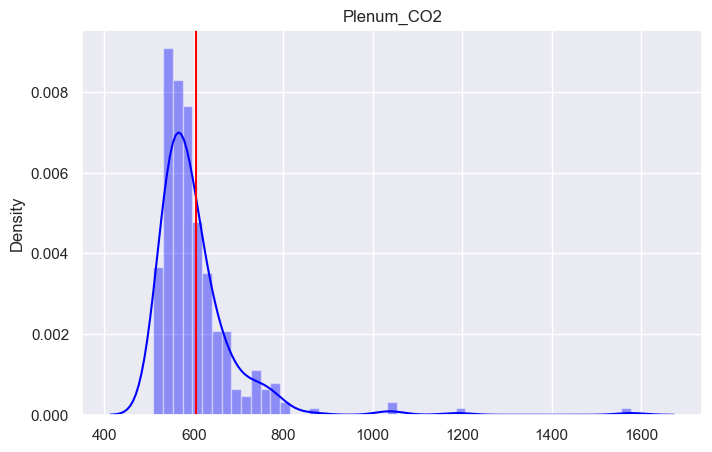

C:\Users\aolenloa\AppData\Local\Temp\ipykernel_22196\4123892087.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


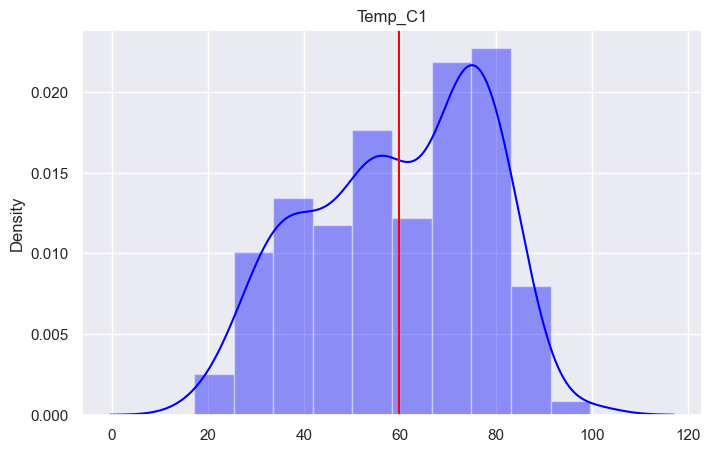

C:\Users\aolenloa\AppData\Local\Temp\ipykernel_22196\4123892087.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


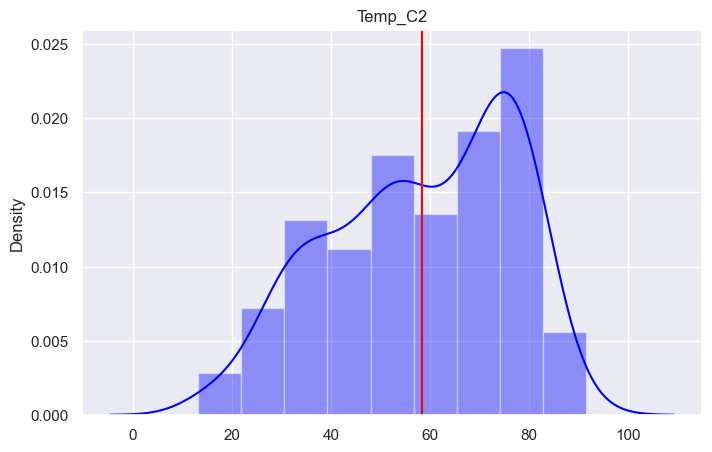

C:\Users\aolenloa\AppData\Local\Temp\ipykernel_22196\4123892087.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


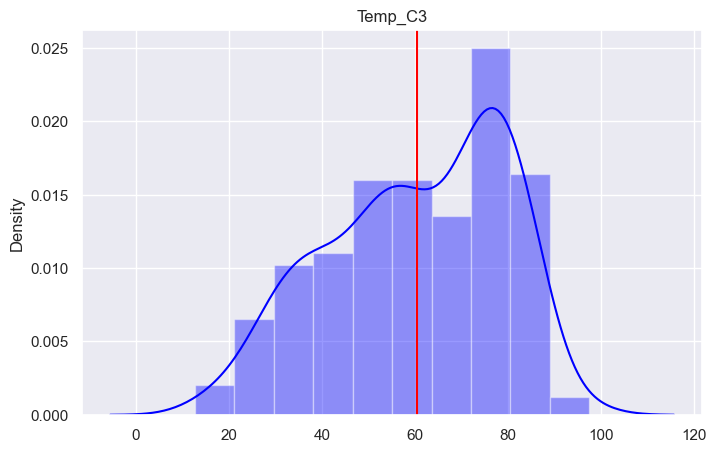

C:\Users\aolenloa\AppData\Local\Temp\ipykernel_22196\4123892087.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


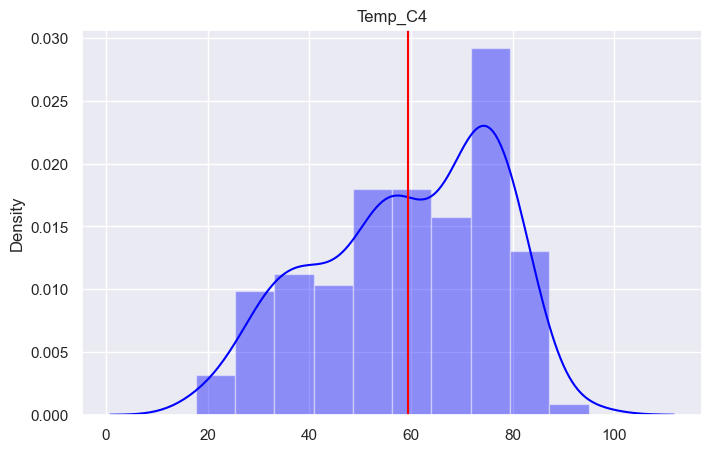

C:\Users\aolenloa\AppData\Local\Temp\ipykernel_22196\4123892087.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


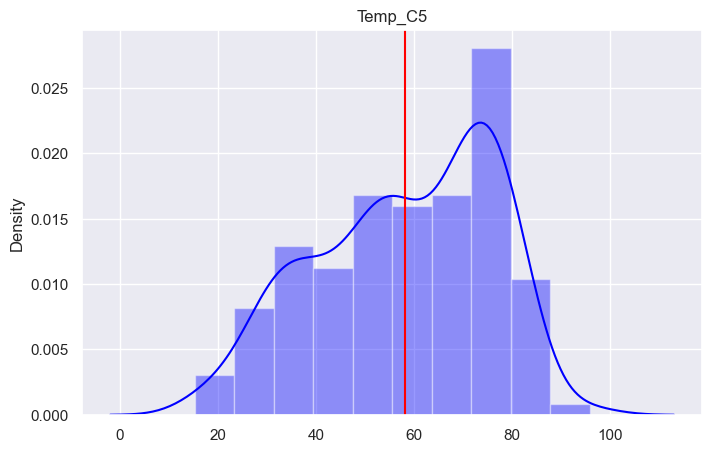

C:\Users\aolenloa\AppData\Local\Temp\ipykernel_22196\4123892087.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


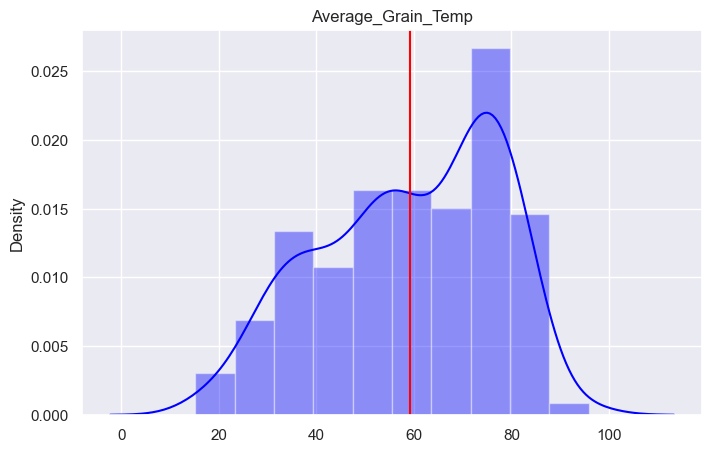

In [249]:
# Example 8 - Investigating the distribution 
# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,5)})

#strings = ['Season', 'Grain_state']
#numeric = [ 'Grain_Bulk_RH','EMC_Center','Ambient_Temp', 'Ambient_RH', 'Headspace_Temp', 'Headspace_RH','Headspace_CO2','Plenum_Temp','Plenum_RH', 
#           'Plenum_CO2','Temp_C1','Temp_C2','Temp_C3','Temp_C4','Temp_C5', 'Average_Grain_Temp']


for n in numeric:
    x = raw_data[n].values
    sns.distplot(x, color = 'blue');

    # Calculating the mean
    mean = raw_data[n].mean()

    #ploting the mean
    plt.axvline(mean, 0,1, color = 'red')
    plt.title(n)
    plt.show()

Grain_Bulk_RH
The meadian is:  67.03791666666665


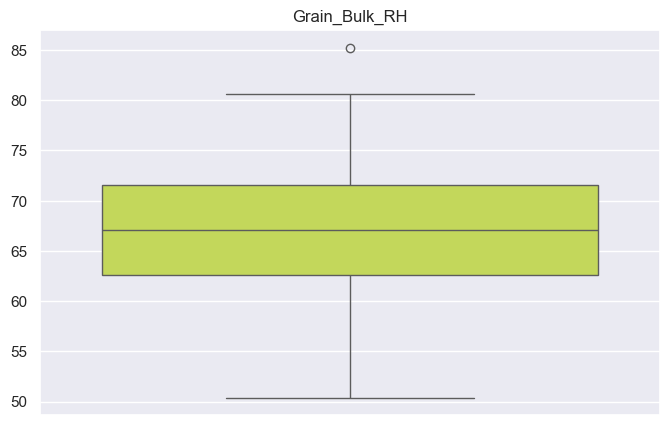

EMC_Center
The meadian is:  14.073


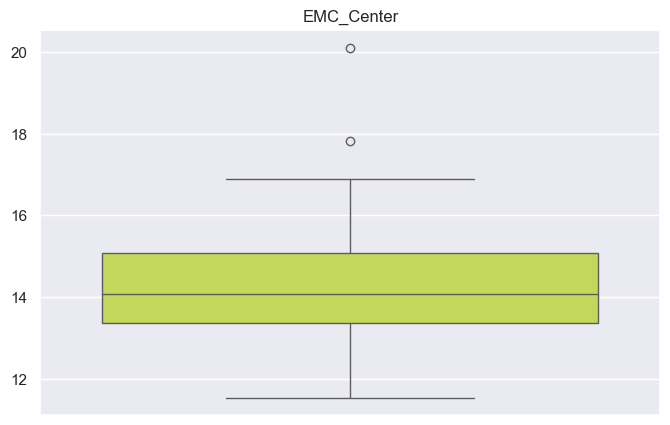

Ambient_Temp
The meadian is:  60.87374999999995


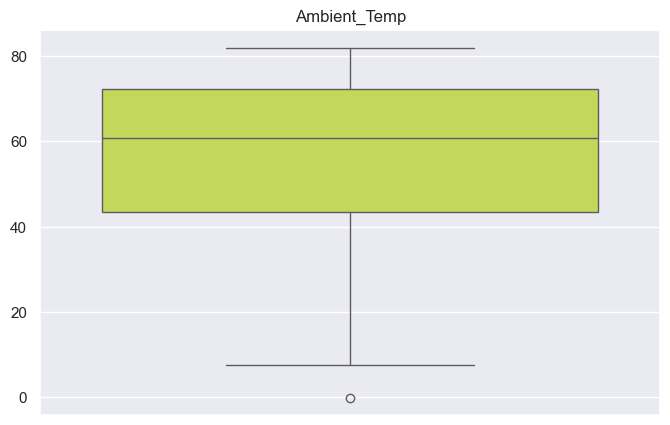

Ambient_RH
The meadian is:  74.30374999999995


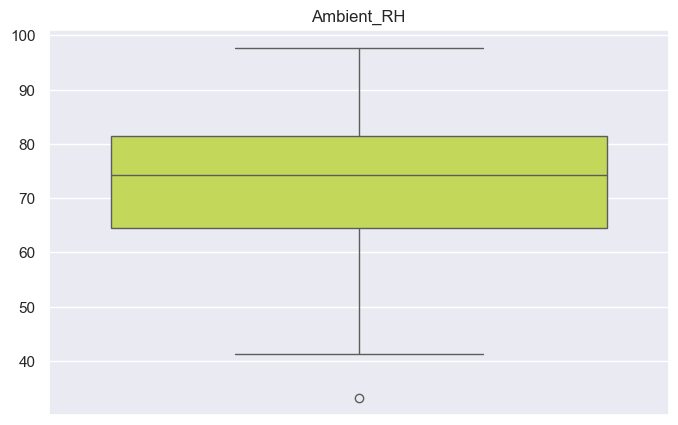

Headspace_Temp
The meadian is:  64.47897708333329


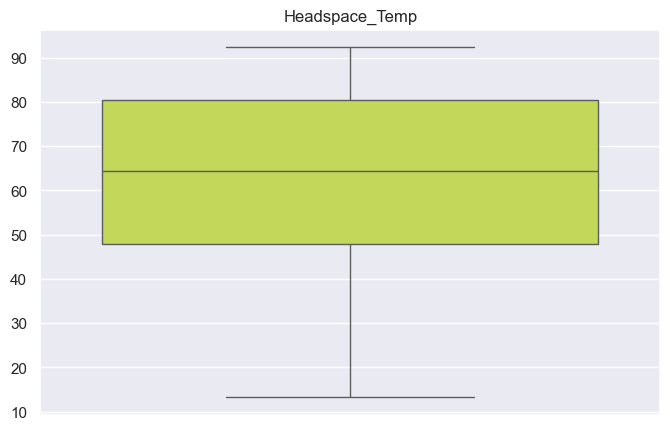

Headspace_RH
The meadian is:  59.95413371212115


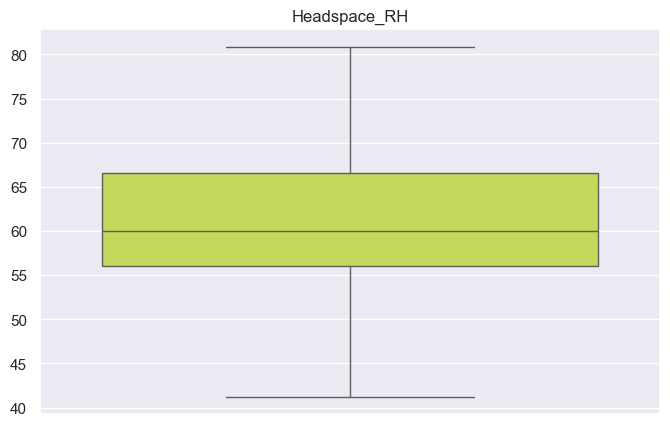

Headspace_CO2
The meadian is:  508.4782608695645


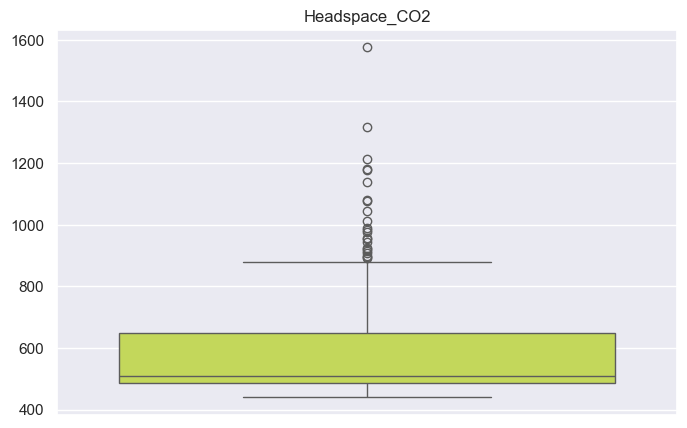

Plenum_Temp
The meadian is:  60.88564999999995


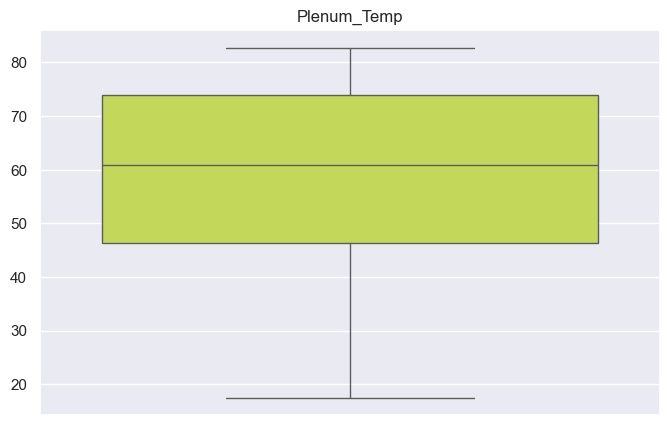

Plenum_RH
The meadian is:  79.81973124999995


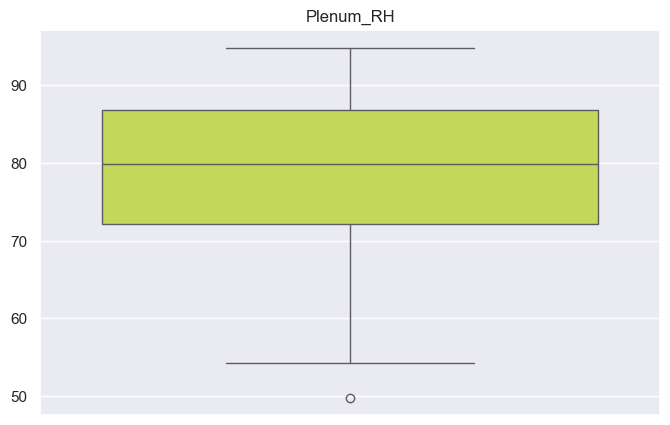

Plenum_CO2
The meadian is:  578.263257575757


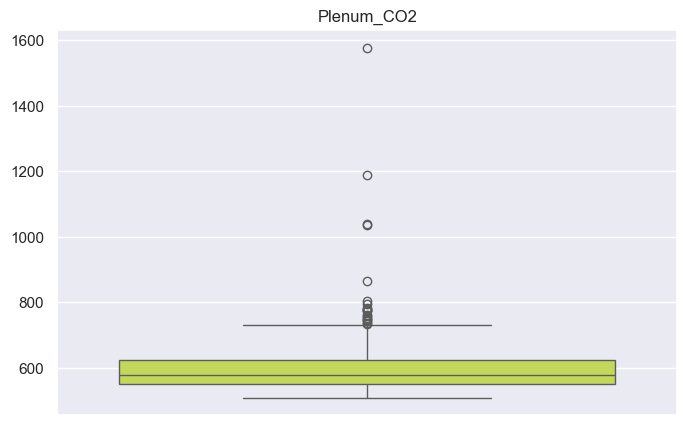

Temp_C1
The meadian is:  60.367083335000004


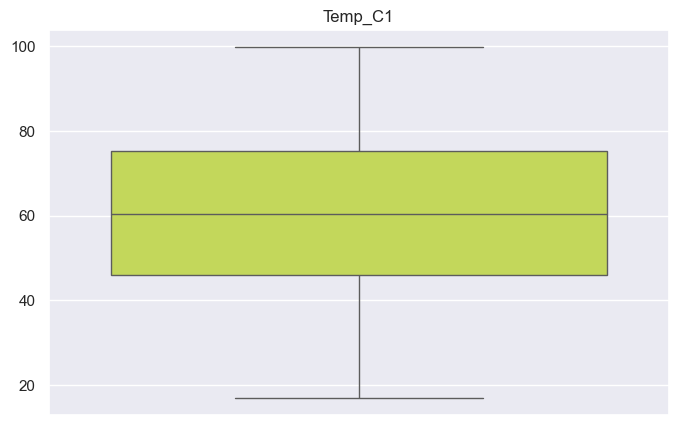

Temp_C2
The meadian is:  59.91496377


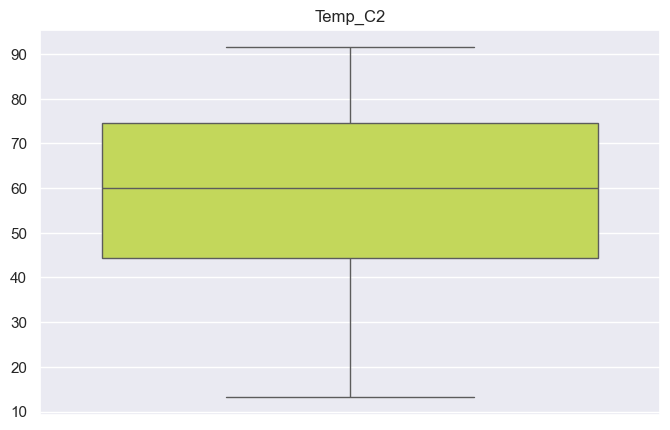

Temp_C3
The meadian is:  62.196875000000006


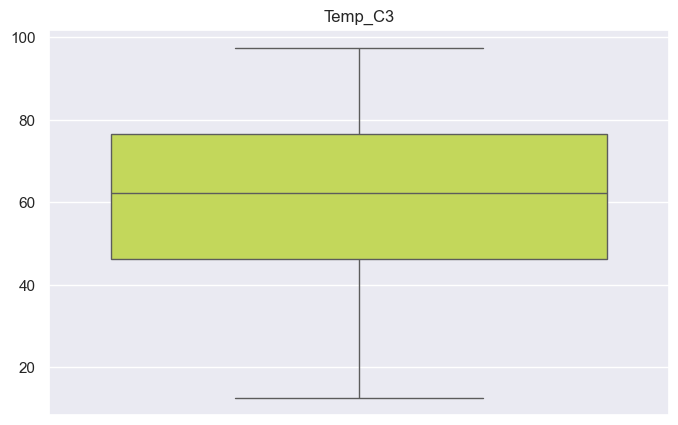

Temp_C4
The meadian is:  60.437916665


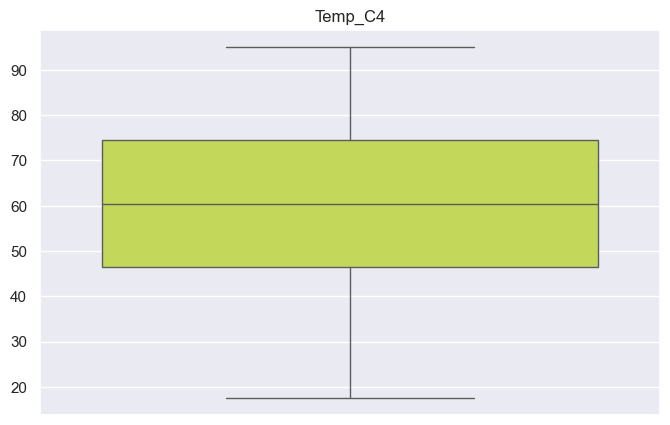

Temp_C5
The meadian is:  59.478070175


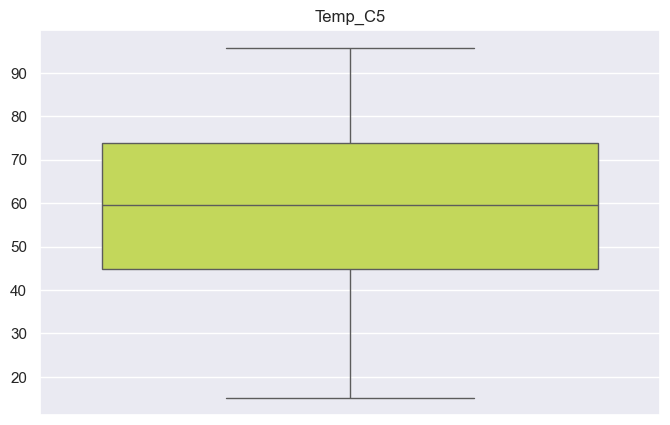

Average_Grain_Temp
The meadian is:  60.381861745


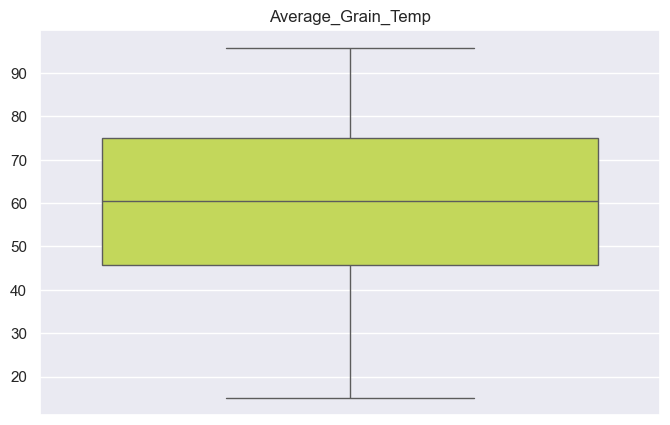

In [250]:
# Example 11 - Investigating the outliers

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,5)})

for c in numeric:
    print(c)
    x = raw_data[c].values
    ax = sns.boxplot(x, color = '#D1EC46')
    print('The meadian is: ', raw_data[c].median())
    plt.title(c)
    plt.show()

In [251]:
raw_data[raw_data['Plenum_CO2'] > 800]

Grain_Bulk_RH  EMC_Center  Ambient_Temp  Ambient_RH  Headspace_Temp  \
201      64.121667   13.425833     76.340417   81.135833       87.123033   
221      61.594167   13.154833     72.827917   81.502917       81.865033   
222      60.552500   12.954000     76.929583   78.140417       85.342930   
223      58.025385   12.820250     77.225833   74.922083       89.194279   
226      59.425000   12.788333     76.557083   80.476667       88.129091   
261      59.940000   13.101600     67.899583   66.486250       76.481846   

     Headspace_RH  Headspace_CO2  Plenum_Temp  Plenum_RH   Plenum_CO2  \
201     56.829700     990.083333    79.024521  81.167829  1188.833333   
221     58.454658     658.833333    75.598433  78.023596  1040.000000   
222     55.925991     671.782609    78.096941  79.296373  1577.681818   
223     54.303950     834.208333    79.753129  76.797971   864.666667   
226     57.698696    1318.521739    81.509929  74.835467  1037.083333   
261     53.953058     652.458333    71.990283  68.359612   805.166667   

       Temp_C1    Temp_C2    Temp_C3    Temp_C4    Temp_C5  \
201  83.430833  80.898333  84.201042  81.005833  80.404167   
221  78.593333  75.945000  79.304167  76.318333  75.501667   
222  82.143333  79.334167  82.643750  79.442500  78.589167   
223  85.179231  82.100769  86.374038  82.306923  80.734615   
226  83.795000  82.365833  85.577083  82.926667  80.881667   
261  71.166667  66.424000  68.975000  67.660000  65.432000   

     Average_Grain_Temp  Season     Grain_state  
201           81.988042  Summer        Moderate  
221           77.132500  Summer  Above-moderate  
222           80.430583  Summer  Above-moderate  
223           83.339115  Summer  Above-moderate  
226           83.109250  Summer  Above-moderate  
261           67.931533    Fall  Above-moderate

In [252]:
raw_data[raw_data['Headspace_CO2'] > 1100]

Grain_Bulk_RH  EMC_Center  Ambient_Temp  Ambient_RH  Headspace_Temp  \
192      58.997500   12.786417     72.815417   76.685833       85.961943   
193      50.400000   11.546000     72.736667   78.127917       85.575508   
194      50.400000   14.855833     70.970417   82.617083       82.694558   
199      63.904444   13.309826     76.389167   71.205417       88.570670   
226      59.425000   12.788333     76.557083   80.476667       88.129091   
234      69.403571   13.801500     75.297917   81.847917       85.420232   

     Headspace_RH  Headspace_CO2  Plenum_Temp  Plenum_RH   Plenum_CO2  \
192     55.920557    1178.695652    76.168826  88.747143   736.391304   
193     57.065204    1213.458333    77.088067  87.474517   781.833333   
194     57.310742    1136.875000    77.299554  84.092417   682.458333   
199     60.997622    1575.217391    80.964579  82.083254   753.708333   
226     57.698696    1318.521739    81.509929  74.835467  1037.083333   
234     65.749355    1181.136364    80.851433  81.651233   626.125000   

       Temp_C1    Temp_C2    Temp_C3    Temp_C4    Temp_C5  \
192  87.122500  83.453333  87.285417  85.053333  84.793333   
193  99.640000  91.500000  97.525000  94.940000  95.800000   
194  99.640000  91.500000  97.525000  94.940000  95.800000   
199  85.967407  83.571538  86.346154  83.720769  82.909231   
226  83.795000  82.365833  85.577083  82.926667  80.881667   
234  81.490000  81.007143  82.230357  81.227857  80.100714   

     Average_Grain_Temp  Season     Grain_state  
192           85.541583  Spring        Moderate  
193           95.881000  Spring        Moderate  
194           95.881000  Summer        Moderate  
199           84.503020  Summer        Moderate  
226           83.109250  Summer  Above-moderate  
234           81.211214  Summer  Above-moderate

In [253]:
from sklearn.preprocessing import MinMaxScaler
# Assuming `raw_data` is your DataFrame, and `y_column` is the target column
y_column='Grain_state'

print(raw_data.columns)

scaler = MinMaxScaler()
# Separate features (X) and target (y)
season=raw_data['Season']
ydata=raw_data[y_column]
X_dataframe= raw_data.drop([y_column, 'Season'], axis=1)
X_dataframe[list(X_dataframe.columns)] = scaler.fit_transform(X_dataframe[list(X_dataframe.columns)])
X_dataframe['Season'] = season
X_dataframe['Grain_state'] = ydata
raw_data=X_dataframe
raw_data



Index(['Grain_Bulk_RH', 'EMC_Center', 'Ambient_Temp', 'Ambient_RH',
       'Headspace_Temp', 'Headspace_RH', 'Headspace_CO2', 'Plenum_Temp',
       'Plenum_RH', 'Plenum_CO2', 'Temp_C1', 'Temp_C2', 'Temp_C3', 'Temp_C4',
       'Temp_C5', 'Average_Grain_Temp', 'Season', 'Grain_state'],
      dtype='object')


Grain_Bulk_RH  EMC_Center  Ambient_Temp  Ambient_RH  Headspace_Temp  \
0         0.623362    0.395236      0.816719    0.513143        0.555311   
1         0.636680    0.400570      0.822113    0.643905        0.594024   
2         0.841203    0.612630      0.481341    0.772315        0.442121   
3         0.664773    0.474129      0.467192    0.622509        0.196796   
4         0.739065    0.479567      0.451443    0.670011        0.216526   
..             ...         ...           ...         ...             ...   
283       0.516440    0.366439      0.551801    0.640113        0.468338   
284       0.709088    0.447776      0.611586    0.861105        0.461720   
285       0.654875    0.409790      0.671884    0.916521        0.558226   
286       0.674408    0.424266      0.641321    0.854942        0.525264   
287       0.655401    0.435004      0.592277    0.778091        0.511610   

     Headspace_RH  Headspace_CO2  Plenum_Temp  Plenum_RH  Plenum_CO2  \
0        0.843374       0.086151     0.645213   0.538649    0.019937   
1        0.783597       0.084735     0.699123   0.643613    0.013538   
2        0.906230       0.062385     0.623931   0.692161    0.008578   
3        1.000000       0.070233     0.469085   0.510636    0.037766   
4        0.871680       0.074304     0.457082   0.402819    0.033397   
..            ...            ...          ...        ...         ...   
283      0.586531       0.143096     0.526954   0.789574    0.126017   
284      0.759351       0.075129     0.526954   0.810039    0.093313   
285      0.728892       0.147215     0.578950   1.000000    0.117044   
286      0.740074       0.081558     0.577066   0.961182    0.104754   
287      0.700689       0.134856     0.568298   0.890243    0.118864   

      Temp_C1   Temp_C2   Temp_C3   Temp_C4   Temp_C5  Average_Grain_Temp  \
0    0.552002  0.624452  0.606860  0.581115  0.582914            0.589342   
1    0.548308  0.631303  0.606897  0.581654  0.583494            0.590143   
2    0.363178  0.427640  0.398575  0.382907  0.384274            0.391120   
3    0.315991  0.354653  0.351030  0.337905  0.334347            0.338722   
4    0.296127  0.339552  0.329867  0.319038  0.314509            0.319705   
..        ...       ...       ...       ...       ...                 ...   
283  0.423094  0.459286  0.453278  0.461607  0.441358            0.447485   
284  0.440378  0.490259  0.472954  0.477734  0.466038            0.469184   
285  0.488931  0.529618  0.515038  0.515899  0.503880            0.510465   
286  0.459112  0.514788  0.488769  0.490096  0.481842            0.486624   
287  0.441638  0.491223  0.475150  0.475151  0.460312            0.468453   

    Season     Grain_state  
0     Fall         Initial  
1     Fall         Initial  
2     Fall         Initial  
3     Fall         Initial  
4     Fall         Initial  
..     ...             ...  
283   Fall  Above-moderate  
284   Fall  Above-moderate  
285   Fall  Above-moderate  
286   Fall  Above-moderate  
287   Fall  Above-moderate  

[288 rows x 18 columns]

In [254]:


# scaler = MinMaxScaler()

# #raw_data[['Age','RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = scaler.fit_transform(raw_data_clean[['Age','RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']])
# raw_data[['Grain_Bulk_RH','EMC_Center','Ambient_Temp', 'Ambient_RH', 'Headspace_Temp', 'Headspace_RH','Headspace_CO2','Plenum_Temp','Plenum_RH','Plenum_CO2','Temp_C1','Temp_C2','Temp_C3','Temp_C4','Temp_C5', 'Average_Grain_Temp']] = \
# scaler.fit_transform(raw_data[['Grain_Bulk_RH','EMC_Center','Ambient_Temp', 'Ambient_RH', 'Headspace_Temp', 'Headspace_RH','Headspace_CO2','Plenum_Temp','Plenum_RH', 'Plenum_CO2','Temp_C1','Temp_C2','Temp_C3','Temp_C4','Temp_C5', 'Average_Grain_Temp']])


#numeric = [ 'Grain_Bulk_RH','EMC_Center','Ambient_Temp', 'Ambient_RH', 'Headspace_Temp', 'Headspace_RH','Headspace_CO2','Plenum_Temp','Plenum_RH', 
#           'Plenum_CO2','Temp_C1','Temp_C2','Temp_C3','Temp_C4','Temp_C5', 'Average_Grain_Temp']

In [255]:
raw_data

Grain_Bulk_RH  EMC_Center  Ambient_Temp  Ambient_RH  Headspace_Temp  \
0         0.623362    0.395236      0.816719    0.513143        0.555311   
1         0.636680    0.400570      0.822113    0.643905        0.594024   
2         0.841203    0.612630      0.481341    0.772315        0.442121   
3         0.664773    0.474129      0.467192    0.622509        0.196796   
4         0.739065    0.479567      0.451443    0.670011        0.216526   
..             ...         ...           ...         ...             ...   
283       0.516440    0.366439      0.551801    0.640113        0.468338   
284       0.709088    0.447776      0.611586    0.861105        0.461720   
285       0.654875    0.409790      0.671884    0.916521        0.558226   
286       0.674408    0.424266      0.641321    0.854942        0.525264   
287       0.655401    0.435004      0.592277    0.778091        0.511610   

     Headspace_RH  Headspace_CO2  Plenum_Temp  Plenum_RH  Plenum_CO2  \
0        0.843374       0.086151     0.645213   0.538649    0.019937   
1        0.783597       0.084735     0.699123   0.643613    0.013538   
2        0.906230       0.062385     0.623931   0.692161    0.008578   
3        1.000000       0.070233     0.469085   0.510636    0.037766   
4        0.871680       0.074304     0.457082   0.402819    0.033397   
..            ...            ...          ...        ...         ...   
283      0.586531       0.143096     0.526954   0.789574    0.126017   
284      0.759351       0.075129     0.526954   0.810039    0.093313   
285      0.728892       0.147215     0.578950   1.000000    0.117044   
286      0.740074       0.081558     0.577066   0.961182    0.104754   
287      0.700689       0.134856     0.568298   0.890243    0.118864   

      Temp_C1   Temp_C2   Temp_C3   Temp_C4   Temp_C5  Average_Grain_Temp  \
0    0.552002  0.624452  0.606860  0.581115  0.582914            0.589342   
1    0.548308  0.631303  0.606897  0.581654  0.583494            0.590143   
2    0.363178  0.427640  0.398575  0.382907  0.384274            0.391120   
3    0.315991  0.354653  0.351030  0.337905  0.334347            0.338722   
4    0.296127  0.339552  0.329867  0.319038  0.314509            0.319705   
..        ...       ...       ...       ...       ...                 ...   
283  0.423094  0.459286  0.453278  0.461607  0.441358            0.447485   
284  0.440378  0.490259  0.472954  0.477734  0.466038            0.469184   
285  0.488931  0.529618  0.515038  0.515899  0.503880            0.510465   
286  0.459112  0.514788  0.488769  0.490096  0.481842            0.486624   
287  0.441638  0.491223  0.475150  0.475151  0.460312            0.468453   

    Season     Grain_state  
0     Fall         Initial  
1     Fall         Initial  
2     Fall         Initial  
3     Fall         Initial  
4     Fall         Initial  
..     ...             ...  
283   Fall  Above-moderate  
284   Fall  Above-moderate  
285   Fall  Above-moderate  
286   Fall  Above-moderate  
287   Fall  Above-moderate  

[288 rows x 18 columns]

In [256]:
# Making categorical variables into numeric representation

# new_raw_data = pd.get_dummies(raw_data, columns = ['Season', 'Grain_state'])


# Using factorize
raw_data['Season'], _ = pd.factorize(raw_data['Season'])
raw_data['Grain_state'], _ = pd.factorize(raw_data['Grain_state'])

raw_data.head()
raw_new_data = raw_data
raw_new_data


Grain_Bulk_RH  EMC_Center  Ambient_Temp  Ambient_RH  Headspace_Temp  \
0         0.623362    0.395236      0.816719    0.513143        0.555311   
1         0.636680    0.400570      0.822113    0.643905        0.594024   
2         0.841203    0.612630      0.481341    0.772315        0.442121   
3         0.664773    0.474129      0.467192    0.622509        0.196796   
4         0.739065    0.479567      0.451443    0.670011        0.216526   
..             ...         ...           ...         ...             ...   
283       0.516440    0.366439      0.551801    0.640113        0.468338   
284       0.709088    0.447776      0.611586    0.861105        0.461720   
285       0.654875    0.409790      0.671884    0.916521        0.558226   
286       0.674408    0.424266      0.641321    0.854942        0.525264   
287       0.655401    0.435004      0.592277    0.778091        0.511610   

     Headspace_RH  Headspace_CO2  Plenum_Temp  Plenum_RH  Plenum_CO2  \
0        0.843374       0.086151     0.645213   0.538649    0.019937   
1        0.783597       0.084735     0.699123   0.643613    0.013538   
2        0.906230       0.062385     0.623931   0.692161    0.008578   
3        1.000000       0.070233     0.469085   0.510636    0.037766   
4        0.871680       0.074304     0.457082   0.402819    0.033397   
..            ...            ...          ...        ...         ...   
283      0.586531       0.143096     0.526954   0.789574    0.126017   
284      0.759351       0.075129     0.526954   0.810039    0.093313   
285      0.728892       0.147215     0.578950   1.000000    0.117044   
286      0.740074       0.081558     0.577066   0.961182    0.104754   
287      0.700689       0.134856     0.568298   0.890243    0.118864   

      Temp_C1   Temp_C2   Temp_C3   Temp_C4   Temp_C5  Average_Grain_Temp  \
0    0.552002  0.624452  0.606860  0.581115  0.582914            0.589342   
1    0.548308  0.631303  0.606897  0.581654  0.583494            0.590143   
2    0.363178  0.427640  0.398575  0.382907  0.384274            0.391120   
3    0.315991  0.354653  0.351030  0.337905  0.334347            0.338722   
4    0.296127  0.339552  0.329867  0.319038  0.314509            0.319705   
..        ...       ...       ...       ...       ...                 ...   
283  0.423094  0.459286  0.453278  0.461607  0.441358            0.447485   
284  0.440378  0.490259  0.472954  0.477734  0.466038            0.469184   
285  0.488931  0.529618  0.515038  0.515899  0.503880            0.510465   
286  0.459112  0.514788  0.488769  0.490096  0.481842            0.486624   
287  0.441638  0.491223  0.475150  0.475151  0.460312            0.468453   

     Season  Grain_state  
0         0            0  
1         0            0  
2         0            0  
3         0            0  
4         0            0  
..      ...          ...  
283       0            3  
284       0            3  
285       0            3  
286       0            3  
287       0            3  

[288 rows x 18 columns]

## 9. Selecting the important features

#### Heatmap
- First we need to create a "Dataset" to display on a Heatmap - we will use a correlation dataset
- .corr() is used to find the pairwise correlation of all columns in the dataframe. Any null values are automatically excluded
- The closer to 1 or -1 the better. As one variable increases, the other variable tends to also increase / decrease
- More Info here: https://statisticsbyjim.com/basics/correlations/

In [257]:
raw_new_data.columns

Index(['Grain_Bulk_RH', 'EMC_Center', 'Ambient_Temp', 'Ambient_RH',
       'Headspace_Temp', 'Headspace_RH', 'Headspace_CO2', 'Plenum_Temp',
       'Plenum_RH', 'Plenum_CO2', 'Temp_C1', 'Temp_C2', 'Temp_C3', 'Temp_C4',
       'Temp_C5', 'Average_Grain_Temp', 'Season', 'Grain_state'],
      dtype='object')

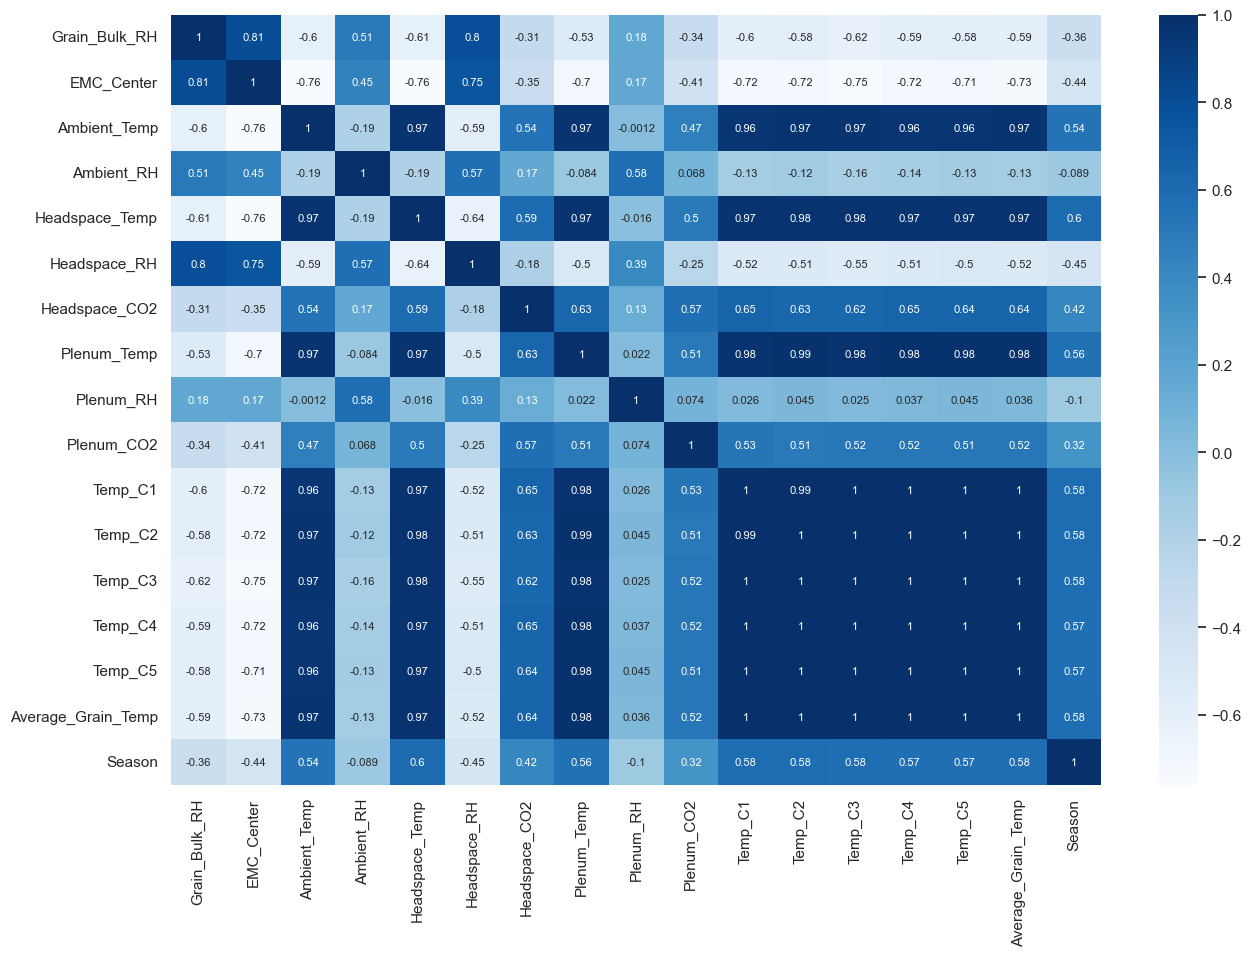

In [258]:
# droping columns we don't need
#del new_raw_data['CarName']

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(15,10)})

n_variables = ['Grain_Bulk_RH', 'EMC_Center', 'Ambient_Temp', 'Ambient_RH',
       'Headspace_Temp', 'Headspace_RH', 'Headspace_CO2', 'Plenum_Temp',
       'Plenum_RH', 'Plenum_CO2', 'Temp_C1', 'Temp_C2', 'Temp_C3', 'Temp_C4',
       'Temp_C5', 'Average_Grain_Temp', 'Season']

pc = raw_new_data[n_variables].corr(method ='pearson')

cols = n_variables

ax = sns.heatmap(pc, annot=True,
                 yticklabels=cols,
                 xticklabels=cols,
                 annot_kws={'size':8},
                 cmap="Blues")

### Feature Importance

Steps of Running Feature Importance

- Split the data into X & y

- Run a Tree-based estimators (i.e. decision trees & random forests)

- Run Feature Importance

- We measure the importance of a feature by calculating the increase in the model’s prediction error after permuting the feature

More info: https://christophm.github.io/interpretable-ml-book/feature-importance.html

In [259]:

# deleting for rerun
try:
    del final_fi
except:
    print("")

# Split the data into X & y

X = raw_new_data.drop(['Grain_state'], axis = 1).values
X_columns = raw_new_data.drop(['Grain_state'], axis = 1)
y = raw_new_data['Grain_state']

print(X.shape)
print(y.shape)

# Run a Tree-based estimators (i.e. decision trees & random forests)
dt = DecisionTreeClassifier(random_state=15, criterion  = 'entropy', max_depth = 10)
dt.fit(X,y)

# If you want to learn how Decesion Trees work, read here: https://www.datacamp.com/community/tutorials/decision-tree-classification-python
# Official Doc: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

# Calculating FI
for i, column in enumerate(raw_new_data.drop(['Grain_state'], axis=1)):
    print('Importance of feature {}:, {:.3f}'.format(column, dt.feature_importances_[i]))
    
    fi = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [dt.feature_importances_[i]]})
    
    try:
        final_fi = pd.concat([final_fi,fi], ignore_index = True)
    except:
        final_fi = fi
        
        
# Ordering the data

final_fi = final_fi.sort_values('Feature Importance Score', ascending = False).reset_index()            
final_fi

(288, 17)
(288,)
Importance of feature Grain_Bulk_RH:, 0.013
Importance of feature EMC_Center:, 0.043
Importance of feature Ambient_Temp:, 0.023
Importance of feature Ambient_RH:, 0.015
Importance of feature Headspace_Temp:, 0.000
Importance of feature Headspace_RH:, 0.005
Importance of feature Headspace_CO2:, 0.380
Importance of feature Plenum_Temp:, 0.085
Importance of feature Plenum_RH:, 0.015
Importance of feature Plenum_CO2:, 0.100
Importance of feature Temp_C1:, 0.152
Importance of feature Temp_C2:, 0.061
Importance of feature Temp_C3:, 0.000
Importance of feature Temp_C4:, 0.020
Importance of feature Temp_C5:, 0.000
Importance of feature Average_Grain_Temp:, 0.007
Importance of feature Season:, 0.082


index            Variable  Feature Importance Score
0       6       Headspace_CO2                  0.379789
1      10             Temp_C1                  0.151817
2       9          Plenum_CO2                  0.099762
3       7         Plenum_Temp                  0.084620
4      16              Season                  0.081861
5      11             Temp_C2                  0.060693
6       1          EMC_Center                  0.042597
7       2        Ambient_Temp                  0.022651
8      13             Temp_C4                  0.020306
9       3          Ambient_RH                  0.015413
10      8           Plenum_RH                  0.015159
11      0       Grain_Bulk_RH                  0.013383
12     15  Average_Grain_Temp                  0.006776
13      5        Headspace_RH                  0.005171
14     12             Temp_C3                  0.000000
15      4      Headspace_Temp                  0.000000
16     14             Temp_C5                  0.000000

## 10. Training & Running the classification model

In [260]:

def view_confusion_matrix(y_test, y_pred, curr_model, save=False):
    curr_model=str(curr_model)
    cm=confusion_matrix(y_test, y_pred)
    disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Initial', 'Minimal', 'Moderate', 'Above-moderate'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion matrix {curr_model}')
    if save==True:
        plt.savefig(f'Confusion matrix {curr_model}')
    plt.show()

def error_metrics(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred) 

    # Mean Squared Error (MSE) 
    mse = mean_squared_error(y_true, y_pred) 
    print(f'Mean Squared Error (MSE): {mse}') 

    # Root Mean Squared Error (RMSE) 
    rmse = np.sqrt(mse) 
    print(f'Root Mean Squared Error (RMSE): {rmse}') 

    # Mean Absolute Percentage Error (MAPE) 
    mape=np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print(f'Mean Absolute Precentage Error (MAPE) {mape:.2f}%')

    # Mean Squared Percentage Error (MSPE) 
    mspe=np.mean(np.square((y_true - y_pred) / y_true)) * 100 
    print(f'Mean Squared Precentage Error (MSPE) {mspe:.2f}%')

    # R-Squared
    r_squared=r2_score(y_true, y_pred)
    print(f'R-Squared value: {r_squared}')


In [261]:

#Spliting the data as 
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.2, random_state=42)


Gradient Boost algorithm 

Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Best cross-validation score: 0.90
Test Accuracy: 0.896551724137931
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       0.50      0.40      0.44         5
           2       0.76      0.87      0.81        15
           3       1.00      0.94      0.97        16

    accuracy                           0.90        58
   macro avg       0.82      0.80      0.81        58
weighted avg       0.90      0.90      0.89        58

Mean Squared Error (MSE): 0.10344827586206896
Root Mean Squared Error (RMSE): 0.32163376045133846
Mean Absolute Precentage Error (MAPE) nan%
Mean Squared Precentage Error (MSPE) nan%
R-Squared value: 0.9334989489776419


C:\Users\aolenloa\AppData\Local\Temp\ipykernel_22196\2655778099.py:23: RuntimeWarning: invalid value encountered in divide
  mape=np.mean(np.abs((y_true - y_pred) / y_true)) * 100
C:\Users\aolenloa\AppData\Local\Temp\ipykernel_22196\2655778099.py:27: RuntimeWarning: invalid value encountered in divide
  mspe=np.mean(np.square((y_true - y_pred) / y_true)) * 100


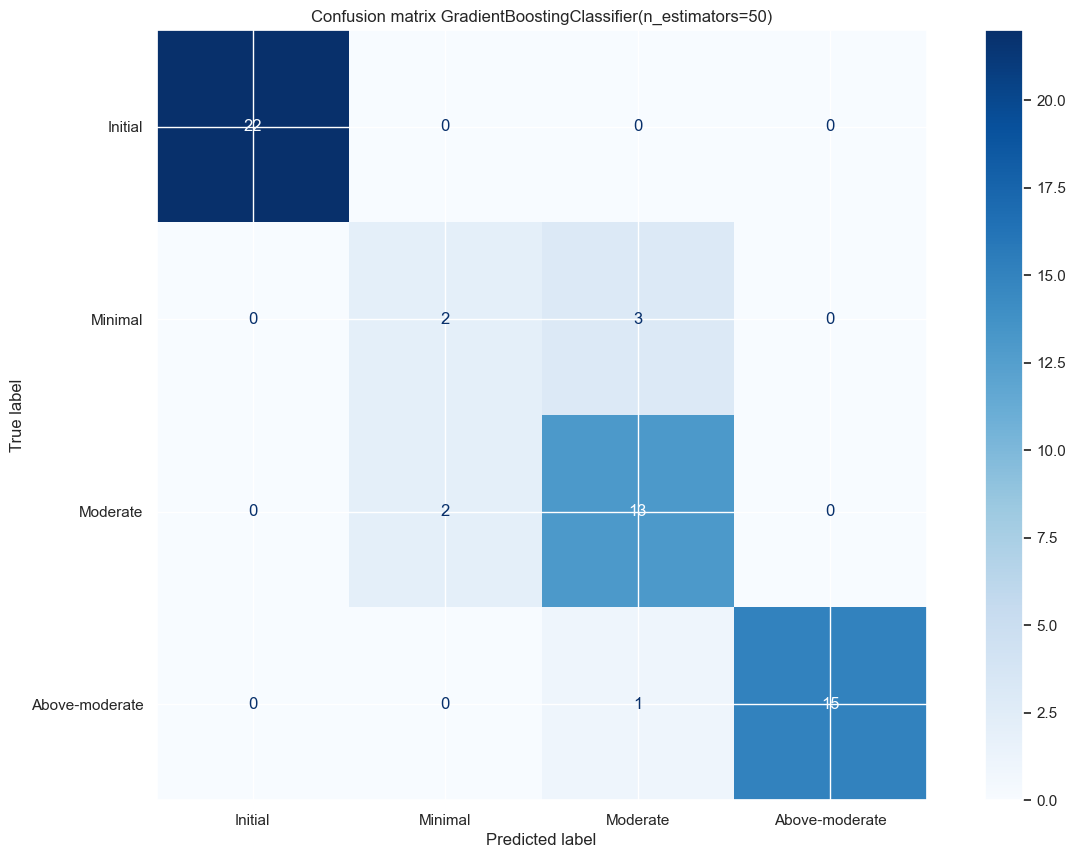

['Model_developed_GBC.joblib']

In [262]:
# training and fitting the data
# ----------------------------------------------------------
#  1. GRADIENT BOOST ALGORITHM TRAINING
# ----------------------------------------------------------

#X_Validation, X_test, Y_Validation, Y_test = train_test_split(X_temp,Y_temp, test_size=0.5, random_state=0)

# Define the parameter grid (finding the hyperparamters)
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2],  # Shrinks the contribution of each tree
    'max_depth': [3, 4, 5]  # Maximum depth of the individual regression estimators
}

# Create a Gradient Boosting classifier
gbc = GradientBoostingClassifier()

# Set up GridSearchCV (Tuning of the hyperparameters)
grid_search = GridSearchCV(gbc, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, Y_train) 

# Best parameters and best cross-validation score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Evaluate on the test set with the best parameters
gbc_best = GradientBoostingClassifier(**grid_search.best_params_)
gbc_best.fit(X_train, Y_train)
y_test_pred = gbc_best.predict(X_test)
print("Test Accuracy:", accuracy_score(Y_test, y_test_pred))
print("Classification Report")
print(classification_report(Y_test, y_test_pred))

# Calculate error metrics
error_metrics(Y_test, y_test_pred)

# Display confusion matrix
view_confusion_matrix(Y_test, y_test_pred, gbc_best, save=True)

#save the model to a file #GBC means GradientBoostingClassifier algorithm
model_filename = 'Model_developed_GBC.joblib'
dump(gbc_best, model_filename)

# train with Gradient Boosting algorithm
#training to obtain the learning rates that gives the maximum accuracy (6 times)
# compute the accuracy scores on train and validation sets when training with different learning rates

#Applying hyper parameter tuning: 
# learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
# for learning_rate in learning_rates:
#     gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
#     gb.fit(X_train, Y_train)
#     print("Learning rate: ", learning_rate)
#     print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, Y_train)))
#     print("Accuracy score (validation): {0:.3f}".format(gb.score(X_Validation, Y_Validation)))
#     print()



u:\Python Practice File\machine_learning\envml\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
10800 fits failed out of a total of 21600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6478 fits failed with the following error:
Traceback (most recent call last):
  File "u:\Python Practice File\machine_learning\envml\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "u:\Python Practice File\machine_learning\envml\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "u:\Python Practice File\machine_learning\envml\Lib\site-packages\sklearn\base.py", line 666, in _validat

Best parameters: {'bootstrap': False, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score: 0.90
Test Accuracy: 0.896551724137931


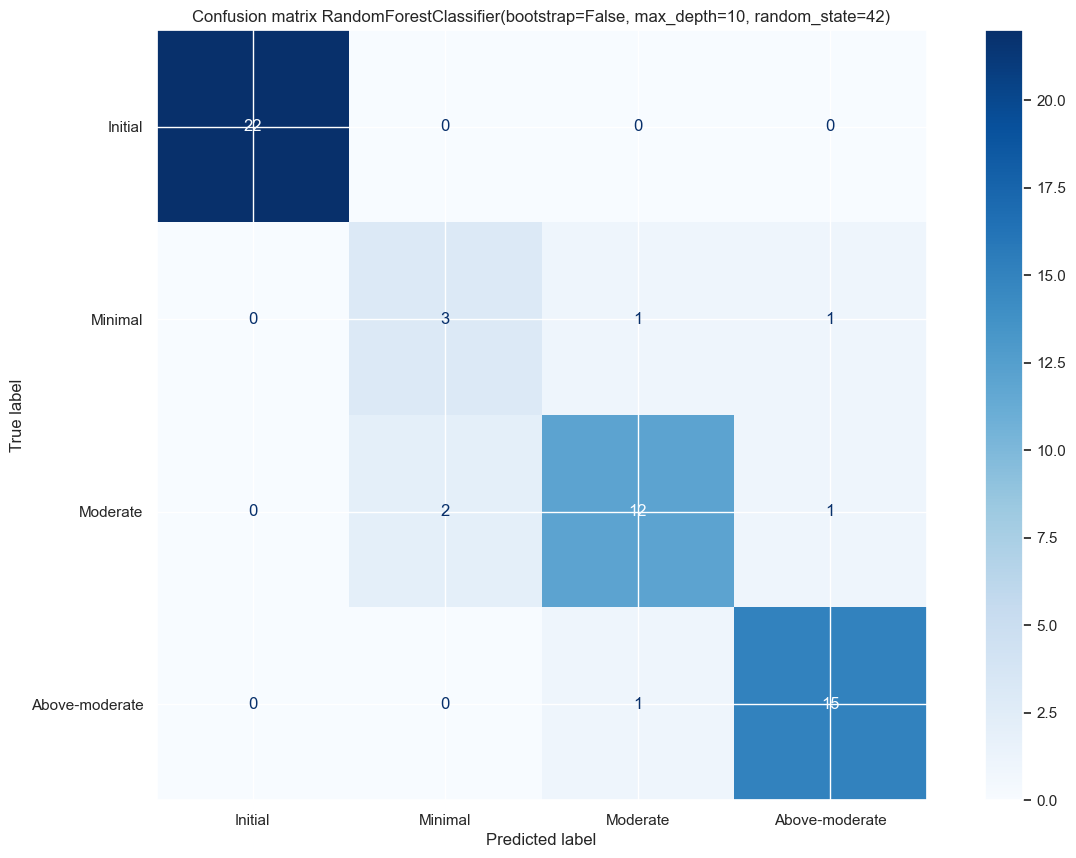

In [263]:
# training and fitting the data
# ----------------------------------------------------------
#    2. RANDOM FOREST ALGORITHM TRAINING
# ----------------------------------------------------------

from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]


# Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Create a Random Forest Classifier
rfc = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, Y_train)

# Best parameters and best cross-validation score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Evaluate on the test set with the best parameters
rfc_best = RandomForestClassifier(**grid_search.best_params_, random_state=42)
rfc_best.fit(X_train, Y_train)
y_test_pred = rfc_best.predict(X_test)
print("Test Accuracy:", accuracy_score(Y_test, y_test_pred))

# Confusion matrix plot
view_confusion_matrix(Y_test, y_test_pred, rfc_best, save=False)


In [264]:
# # Use the random grid to search for best hyperparameters
# # First create the base model to tune
# rf = RandomForestRegressor()
# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# # Fit the random search model
# rf_random.fit(X_train, Y_train)
# rf_random.best_params_

Confusion Matrix:
[[22  0  0  0]
 [ 0  3  1  1]
 [ 0  2 12  1]
 [ 0  0  1 15]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       0.60      0.60      0.60         5
           2       0.86      0.80      0.83        15
           3       0.88      0.94      0.91        16

    accuracy                           0.90        58
   macro avg       0.83      0.83      0.83        58
weighted avg       0.90      0.90      0.90        58

Mean Squared Error (MSE): 0.15517241379310345
Root Mean Squared Error (RMSE): 0.3939192985791677
Mean Absolute Precentage Error (MAPE) nan%
Mean Squared Precentage Error (MSPE) nan%
R-Squared value: 0.9002484234664628


C:\Users\aolenloa\AppData\Local\Temp\ipykernel_22196\2655778099.py:23: RuntimeWarning: invalid value encountered in divide
  mape=np.mean(np.abs((y_true - y_pred) / y_true)) * 100
C:\Users\aolenloa\AppData\Local\Temp\ipykernel_22196\2655778099.py:27: RuntimeWarning: invalid value encountered in divide
  mspe=np.mean(np.square((y_true - y_pred) / y_true)) * 100


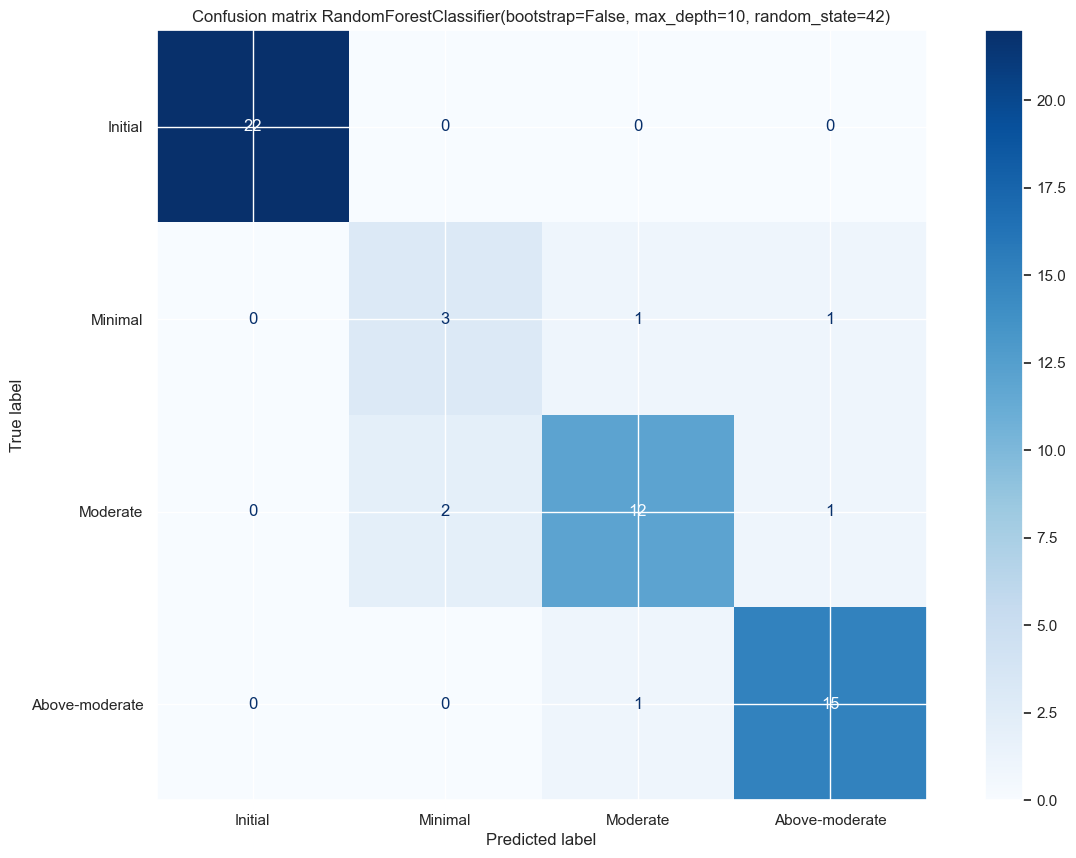

In [265]:
# # training and fitting the data
#  # train random forest training algorithm

# save the model to a file #GBC means GradientBoostingClassifier algorithm

model_filename = 'Model_developed_RandomForest.joblib'
dump(rfc_best, model_filename)

y_pred = rfc_best.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(Y_test, y_test_pred))
print()
print("Classification Report")
print(classification_report(Y_test, y_test_pred))


# Calculate error metrics
error_metrics(Y_test, y_test_pred)

# Display confusion matrix
view_confusion_matrix(Y_test, y_test_pred, rfc_best, save=True)

Best parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best cross-validation score: 0.85
Test Accuracy: 0.7586206896551724
Confusion Matrix:
[[21  0  1  0]
 [ 0  3  1  1]
 [ 0  4  8  3]
 [ 0  0  4 12]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        22
           1       0.43      0.60      0.50         5
           2       0.57      0.53      0.55        15
           3       0.75      0.75      0.75        16

    accuracy                           0.76        58
   macro avg       0.69      0.71      0.69        58
weighted avg       0.77      0.76      0.76        58

Mean Squared Error (MSE): 0.3448275862068966
Root Mean Squared Error (RMSE): 0.5872202195147035
Mean Absolute Precentage Error (MAPE) nan%
Mean Squared Precentage Error (MSPE) nan%
R-Squared value: 0.778329829925473


C:\Users\aolenloa\AppData\Local\Temp\ipykernel_22196\2655778099.py:23: RuntimeWarning: divide by zero encountered in divide
  mape=np.mean(np.abs((y_true - y_pred) / y_true)) * 100
C:\Users\aolenloa\AppData\Local\Temp\ipykernel_22196\2655778099.py:23: RuntimeWarning: invalid value encountered in divide
  mape=np.mean(np.abs((y_true - y_pred) / y_true)) * 100
C:\Users\aolenloa\AppData\Local\Temp\ipykernel_22196\2655778099.py:27: RuntimeWarning: divide by zero encountered in divide
  mspe=np.mean(np.square((y_true - y_pred) / y_true)) * 100
C:\Users\aolenloa\AppData\Local\Temp\ipykernel_22196\2655778099.py:27: RuntimeWarning: invalid value encountered in divide
  mspe=np.mean(np.square((y_true - y_pred) / y_true)) * 100


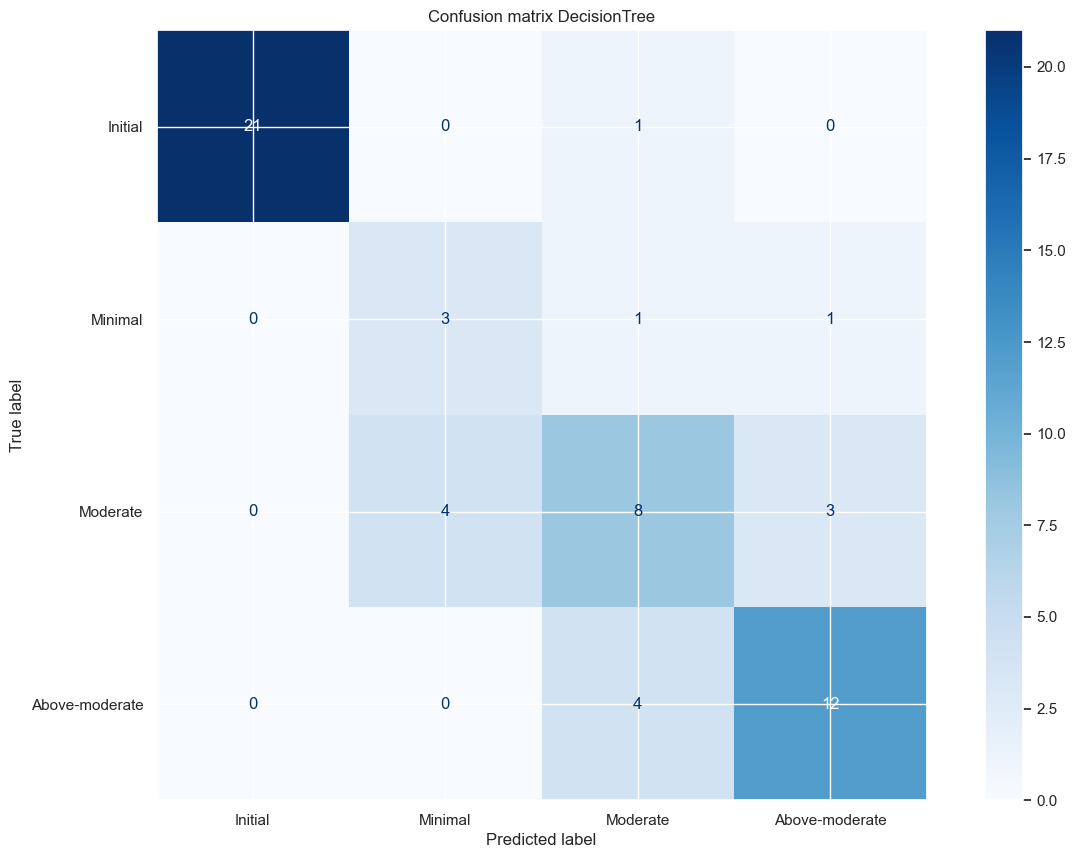

In [266]:
# training and fitting the data
# ----------------------------------------------------------
#    3. DECISION TREE CLASSIFIER ALGORITHM TRAINING
# ----------------------------------------------------------

# Define the parameter grid
param_grid = {
'max_depth': [None, 10, 20, 30, 40], # Maximum depth of the tree
'min_samples_split': [2, 5, 10], # Minimum number of samples required to split a node
'min_samples_leaf': [1, 2, 4], # Minimum number of samples required at a leaf node
'criterion': ['gini', 'entropy'] # Function to measure the quality of a split
}

# Create a Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, Y_train)

# Best parameters and best cross-validation score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Evaluate on the test set with the best parameters
dt_best = DecisionTreeClassifier(**grid_search.best_params_, random_state=42)
dt_best.fit(X_train, Y_train)
y_test_pred = dt_best.predict(X_test)
print("Test Accuracy:", accuracy_score(Y_test, y_test_pred))

model_filename = 'Model_developed_Decision_Tree.joblib'
dump(dt_best, model_filename)

y_pred = dt_best.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(Y_test, y_test_pred))
print()
print("Classification Report")
print(classification_report(Y_test, y_test_pred))

# Calculate error metrics
error_metrics(Y_test, y_test_pred)

# Display confusion matrix
view_confusion_matrix(Y_test, y_test_pred, 'DecisionTree', save=True)

In [267]:
# training and fitting the data
# ----------------------------------------------------------
#   4. SVM CLASSIFIER ALGORITHM TRAINING
# ----------------------------------------------------------

from sklearn.model_selection import GridSearchCV 

# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
svm=SVC()
grid_search = GridSearchCV(svm, param_grid, cv=5) 
  
# fitting the model for grid search 
grid_search.fit(X_train, Y_train) 

print("Best parameters:", grid_search.best_params_) 
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_)) # Evaluate on the test set with the best parameters 

svm_best = SVC(**grid_search.best_params_) 
svm_best.fit(X_train, Y_train) 
y_test_pred = svm_best.predict(X_test) 
print("Test Accuracy:", accuracy_score(Y_test, y_test_pred))


# # print best parameter after tuning 
# print(grid.best_params_) 
  
# # print how our model looks after hyper-parameter tuning 
# print(grid.best_estimator_) 

Best parameters: {'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation score: 0.90
Test Accuracy: 0.8793103448275862


[[21  1  0  0]
 [ 1  3  1  0]
 [ 0  2 12  1]
 [ 0  1  0 15]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        22
           1       0.43      0.60      0.50         5
           2       0.92      0.80      0.86        15
           3       0.94      0.94      0.94        16

    accuracy                           0.88        58
   macro avg       0.81      0.82      0.81        58
weighted avg       0.90      0.88      0.89        58

Mean Squared Error (MSE): 0.1724137931034483
Root Mean Squared Error (RMSE): 0.41522739926869984
Mean Absolute Precentage Error (MAPE) nan%
Mean Squared Precentage Error (MSPE) nan%
R-Squared value: 0.8891649149627365


C:\Users\aolenloa\AppData\Local\Temp\ipykernel_22196\2655778099.py:23: RuntimeWarning: divide by zero encountered in divide
  mape=np.mean(np.abs((y_true - y_pred) / y_true)) * 100
C:\Users\aolenloa\AppData\Local\Temp\ipykernel_22196\2655778099.py:23: RuntimeWarning: invalid value encountered in divide
  mape=np.mean(np.abs((y_true - y_pred) / y_true)) * 100
C:\Users\aolenloa\AppData\Local\Temp\ipykernel_22196\2655778099.py:27: RuntimeWarning: divide by zero encountered in divide
  mspe=np.mean(np.square((y_true - y_pred) / y_true)) * 100
C:\Users\aolenloa\AppData\Local\Temp\ipykernel_22196\2655778099.py:27: RuntimeWarning: invalid value encountered in divide
  mspe=np.mean(np.square((y_true - y_pred) / y_true)) * 100


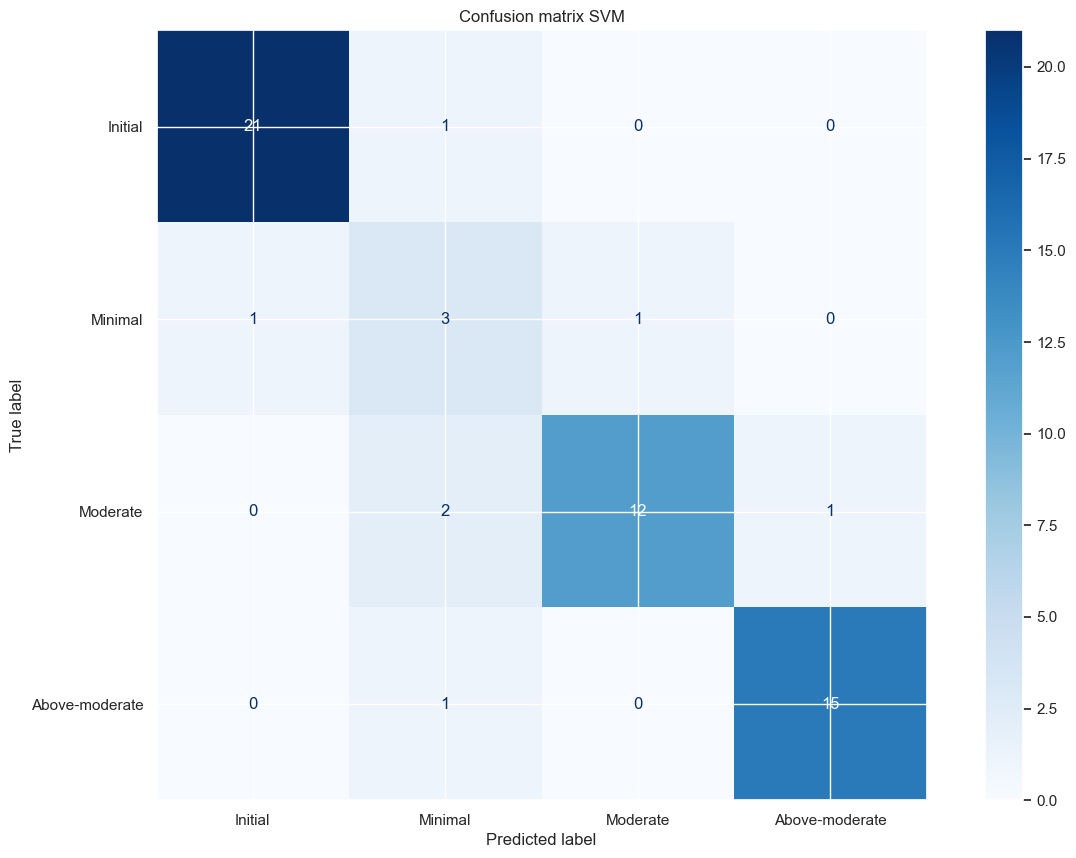

In [268]:

# train the model on train set 

# SVM_model = SVC(C=100, gamma=1) 
# SVM_model.fit(X_train, Y_train) 

model_filename = 'Model_developed_SVM.joblib'
dump(svm_best, model_filename)

print(confusion_matrix(Y_test, y_test_pred))
print(classification_report(Y_test, y_test_pred))

# Calculate error metrics
error_metrics(Y_test, y_test_pred)

# Display confusion matrix
view_confusion_matrix(Y_test, y_test_pred, 'SVM', save=True)


In [269]:
# --------------------------------------------------------------------------------------------------------------------------------------------------------
# 
#       ENDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDD 
#         ENDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDD 
#           ENDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDD 
#               ENDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDD 
# ------------------------------------------------------------------------------------------------------------------------------------------------------------
